In [503]:
  >>> import nltk
  >>> nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dishu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [504]:
import pandas as pd
import nltk
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt

In [505]:
df = pd.read_csv('HP_PD (1).csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rating     1008 non-null   int64  
 1   Date       1008 non-null   object 
 2   Review     606 non-null    object 
 3   Sentiment  603 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.6+ KB


,Rating,Date,Review,Sentiment
0,4,14-Feb-2023,Its not 128gb its 115gb,0.0
1,4,3-Feb-2023,Excellent product 👍,1.0
2,4,26-Jan-2023,It's finishing and quality including brand......,1.0
3,4,13-Jan-2023,It's good ... The speed is amazing,1.0
4,4,3-Jan-2023,Like but price can be low,0.0


In [506]:
df.dropna(inplace=True)
df.head(10)

,Rating,Date,Review,Sentiment
0,4,14-Feb-2023,Its not 128gb its 115gb,0.0
1,4,3-Feb-2023,Excellent product 👍,1.0
2,4,26-Jan-2023,It's finishing and quality including brand......,1.0
3,4,13-Jan-2023,It's good ... The speed is amazing,1.0
4,4,3-Jan-2023,Like but price can be low,0.0
5,4,21-Jan-2023,Good looking and premium to use,1.0
7,5,16-Feb-2023,Very good product quantity price the best,1.0
8,5,15-Feb-2023,Transfer speed is good. Go ahead.,1.0
9,5,16-Feb-2023,Good,1.0
10,5,7-Feb-2023,This is a good product in Amazon deeal,1.0


In [507]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 0 to 608
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rating     601 non-null    int64  
 1   Date       601 non-null    object 
 2   Review     601 non-null    object 
 3   Sentiment  601 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.5+ KB


In [508]:
import nltk
import re
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(df['Review']))
df["Review_1"]= df["Review"].apply(normalize_document)

In [509]:
df

,Rating,Date,Review,Sentiment,Review_1
0,4,14-Feb-2023,Its not 128gb its 115gb,0.0,128gb 115gb
1,4,3-Feb-2023,Excellent product 👍,1.0,excellent product
2,4,26-Jan-2023,It's finishing and quality including brand......,1.0,finishing quality including brand
3,4,13-Jan-2023,It's good ... The speed is amazing,1.0,good speed amazing
4,4,3-Jan-2023,Like but price can be low,0.0,like price low
...,...,...,...,...,...
604,5,2-Mar-2020,Worth buying .. Value.for money,1.0,worth buying valuefor money
605,5,1-Mar-2020,Good and faster than other,1.0,good faster
606,5,29-Feb-2020,Hp796L seriously awesome pen drive,1.0,hp796l seriously awesome pen drive
607,5,17-Nov-2019,"Good product , capacity of 30 gb.Timely delivered",1.0,good product capacity 30 gbtimely delivered


In [510]:

# Convert numpy array to text
text = '. \n'.join(norm_corpus.flatten())

text

'128gb 115gb. \nexcellent product. \nfinishing quality including brand. \ngood speed amazing. \nlike price low. \ngood looking premium use. \ngood product quantity price best. \ntransfer speed good go ahead. \ngood. \ngood product amazon deeal. \npens drive best. \ngood working product long life usesable storage product. \nproduct product quality nice storage capacity good 64gb missed 7gb received 57gb. \ngood storage scammed. \nusing month issues. \ngood product value money. \ngaled product good. \ndata storage excellent. \nmistake washing machine washed still working. \n1. \nalways useful. \nokay. \ngood product. \ngood woking super. \ngood. \ngood use. \ntransfer rate low usb 3x. \nsuper. \ngood product. \npen drive corrupted within 2 years data lose. \nstorage capacity 123 gb. \nnice. \nthank amazon service good delivery guy. \nworking fine good speed. \npendrive extremely good metallic casing protect heavy accidental damages drive quoted 128 gb around 12 gb unusable memory makes a

In [511]:
blob = TextBlob(text)
blob.sentiment 

Sentiment(polarity=0.37961726975693283, subjectivity=0.5975963499566885)

In [512]:
#Display all sentences separately 
blob.sentences

[Sentence("128gb 115gb."),
 Sentence("excellent product."),
 Sentence("finishing quality including brand."),
 Sentence("good speed amazing."),
 Sentence("like price low."),
 Sentence("good looking premium use."),
 Sentence("good product quantity price best."),
 Sentence("transfer speed good go ahead."),
 Sentence("good."),
 Sentence("good product amazon deeal."),
 Sentence("pens drive best."),
 Sentence("good working product long life usesable storage product."),
 Sentence("product product quality nice storage capacity good 64gb missed 7gb received 57gb."),
 Sentence("good storage scammed."),
 Sentence("using month issues."),
 Sentence("good product value money."),
 Sentence("galed product good."),
 Sentence("data storage excellent."),
 Sentence("mistake washing machine washed still working."),
 Sentence("1. 
 always useful."),
 Sentence("okay."),
 Sentence("good product."),
 Sentence("good woking super."),
 Sentence("good."),
 Sentence("good use."),
 Sentence("transfer rate low usb 3x

In [513]:
# List of all sentiment words 
blist = blob.sentiment_assessments.assessments
blist

[(['excellent'], 1.0, 1.0, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['amazing'], 0.6000000000000001, 0.9, None),
 (['low'], 0.0, 0.3, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['best'], 1.0, 0.3, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['best'], 1.0, 0.3, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['long'], -0.05, 0.4, None),
 (['nice'], 0.6, 1.0, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['excellent'], 1.0, 1.0, None),
 (['useful'], 0.3, 0.0, None),
 (['okay'], 0.5, 0.5, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['super'], 0.3333333333333333, 0.6666666666666666, None),
 (['good'], 0.7, 0.6000000000000001, None),
 ([

In [514]:
psentence = []
for p in range(len(blob.sentences)):
    if blob.sentences[p].sentiment_assessments.assessments != []:
        pl = blob.sentences[p].sentiment_assessments.assessments[0][1]
        if pl > 0:
            psentence.append(blob.sentences[p])
            
print(psentence[0:25])

[Sentence("excellent product."), Sentence("good speed amazing."), Sentence("good looking premium use."), Sentence("good product quantity price best."), Sentence("transfer speed good go ahead."), Sentence("good."), Sentence("good product amazon deeal."), Sentence("pens drive best."), Sentence("good working product long life usesable storage product."), Sentence("product product quality nice storage capacity good 64gb missed 7gb received 57gb."), Sentence("good storage scammed."), Sentence("good product value money."), Sentence("galed product good."), Sentence("data storage excellent."), Sentence("1. 
always useful."), Sentence("okay."), Sentence("good product."), Sentence("good woking super."), Sentence("good."), Sentence("good use."), Sentence("super."), Sentence("good product."), Sentence("nice."), Sentence("thank amazon service good delivery guy."), Sentence("working fine good speed.")]


In [515]:
len(psentence)

396

In [516]:
senti_pos = []
for i in range(len(blist)):
    plt = blist[i][1]
    if plt > 0:
        senti_pos.append(blist[i][0])

senti_pos
#len(senti_pos)

[['excellent'],
 ['good'],
 ['amazing'],
 ['good'],
 ['good'],
 ['best'],
 ['good'],
 ['good'],
 ['good'],
 ['best'],
 ['good'],
 ['nice'],
 ['good'],
 ['good'],
 ['good'],
 ['good'],
 ['excellent'],
 ['useful'],
 ['okay'],
 ['good'],
 ['good'],
 ['super'],
 ['good'],
 ['good'],
 ['super'],
 ['good'],
 ['nice'],
 ['good'],
 ['fine'],
 ['good'],
 ['extremely', 'good'],
 ['good'],
 ['awesome'],
 ['normal'],
 ['nice'],
 ['smoothly'],
 ['happy'],
 ['good'],
 ['really'],
 ['best'],
 ['good'],
 ['good'],
 ['good'],
 ['awesome'],
 ['great'],
 ['superb'],
 ['good'],
 ['good'],
 ['much'],
 ['live'],
 ['frequently'],
 ['wise'],
 ['good'],
 ['really', 'good'],
 ['sure'],
 ['wise'],
 ['good'],
 ['love'],
 ['fast'],
 ['okay'],
 ['superb'],
 ['good'],
 ['sure'],
 ['much'],
 ['important'],
 ['happy'],
 ['quick'],
 ['genuine'],
 ['sure'],
 ['latest'],
 ['much'],
 ['really'],
 ['nice'],
 ['worth'],
 ['nice'],
 ['good'],
 ['complete'],
 ['good'],
 ['nice'],
 ['specially'],
 ['able'],
 ['first'],
 ['good

In [517]:
psenti = []
for i in range(len(senti_pos)):
    plist = senti_pos[i]
    for j in range(len(plist)):
        psenti.append(plist[j])
    
psenti
len(psenti)

678

In [518]:
len(set(psenti))

105

In [519]:
ngram_freq = nltk.FreqDist() #WE INITIALIZED A FREQUENCY COUNTER

for ngram in nltk.ngrams(psenti, 1):
    ngram_freq[ngram] += 1
ngram_freq.most_common(297)


[(('good',), 231),
 (('nice',), 67),
 (('fast',), 24),
 (('best',), 23),
 (('excellent',), 22),
 (('awesome',), 18),
 (('great',), 16),
 (('better',), 16),
 (('much',), 14),
 (('ok',), 12),
 (('super',), 11),
 (('high',), 10),
 (('really',), 8),
 (('hot',), 8),
 (('genuine',), 7),
 (('easy',), 7),
 (('original',), 7),
 (('superb',), 6),
 (('pretty',), 6),
 (('fine',), 5),
 (('happy',), 5),
 (('worth',), 5),
 (('large',), 5),
 (('handy',), 5),
 (('amazing',), 4),
 (('useful',), 4),
 (('sure',), 4),
 (('satisfied',), 4),
 (('thanks',), 4),
 (('strong',), 4),
 (('decent',), 4),
 (('okay',), 3),
 (('normal',), 3),
 (('wise',), 3),
 (('love',), 3),
 (('important',), 3),
 (('able',), 3),
 (('first',), 3),
 (('beautifully',), 3),
 (('satisfying',), 3),
 (('cheap',), 3),
 (('warm',), 3),
 (('light',), 3),
 (('liked',), 3),
 (('extremely',), 2),
 (('smoothly',), 2),
 (('quick',), 2),
 (('specially',), 2),
 (('available',), 2),
 (('early',), 2),
 (('stylish',), 2),
 (('quickly',), 2),
 (('full',

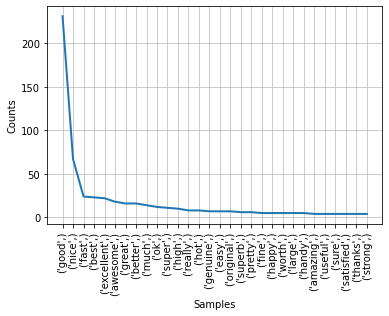

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [520]:
ngram_freq.plot(30)

In [521]:
nsentence = []
for p in range(len(blob.sentences)):
    if blob.sentences[p].sentiment_assessments.assessments != []:
        pl = blob.sentences[p].sentiment_assessments.assessments[0][1]
        if pl < 0:
            nsentence.append(blob.sentences[p])
            
print(nsentence[0:25])

[Sentence("small enough carry pocket appears durable 128gb size unbelievable hp reliable brand happy chosen."), Sentence("ordered set 3 pendrives pendrive slow even usb 20 pendrive reads data faster usb 31 really feel like worst purchase selection dont like buy."), Sentence("looking bootable usb drive dont go one odd reason works slowly loaded bootable iso tried multiple linux iso finally gave compared one sandisk cruzer blade 16gb works much faster bootable drive hp pendrive took several minutes balena etcher burn live iso nomadbsd pendrive whereas sandisk pendrive took minute maybe booting hp drive boot freezing frequently seen issue sandisk pendrive also hp drive heats lot storage wise good try store big file data transfer really good sure work bootable drive maybe got faulty piece dont know look feel wise hp drive gives polished premium look due metal body however performance use good look overall recommend go one would say go sandisk."), Sentence("pendrive file transfer speed slow

In [522]:
# Number of negative sentiment sentences 
len(nsentence)

61

In [523]:
senti_neg = []
for i in range(len(blist)):
    plt = blist[i][1]
    if plt < 0:
        senti_neg.append(blist[i][0])

In [524]:
len(senti_neg)

151

In [525]:
nsenti = []
for i in range(len(senti_neg)):
    nlist = senti_neg[i]
    for j in range(len(nlist)):
        nsenti.append(nlist[j])

In [526]:
len(set(nsenti))

54

In [527]:
ngram_freq = nltk.FreqDist() #WE INITIALIZED A FREQUENCY COUNTER

for ngram in nltk.ngrams(nsenti, 1):
    ngram_freq[ngram] += 1
ngram_freq.most_common(188)

[(('slow',), 23),
 (('bad',), 15),
 (('little',), 11),
 (('small',), 8),
 (('average',), 7),
 (('less',), 7),
 (('poor',), 6),
 (('long',), 4),
 (('worst',), 4),
 (('waste',), 4),
 (('fake',), 4),
 (('expensive',), 4),
 (('expected',), 4),
 (('heavy',), 3),
 (('slowly',), 3),
 (('due',), 3),
 (('disappointed',), 3),
 (('approximately',), 2),
 (('slightly',), 2),
 (('center',), 2),
 (('single',), 2),
 (('difficult',), 2),
 (('extremely',), 2),
 (('wasted',), 2),
 (('properly',), 2),
 (('unbelievable',), 1),
 (('odd',), 1),
 (('mean',), 1),
 (('unknown',), 1),
 (('ordinary',), 1),
 (('hard',), 1),
 (('serious',), 1),
 (('mostly',), 1),
 (('ill',), 1),
 (('least',), 1),
 (('mere',), 1),
 (('corrupt',), 1),
 (('rough',), 1),
 (('limited',), 1),
 (('much',), 1),
 (('unable',), 1),
 (('past',), 1),
 (('stupid',), 1),
 (('unfortunately',), 1),
 (('humbly',), 1),
 (('pathetic',), 1),
 (('actually',), 1),
 (('broken',), 1),
 (('tight',), 1),
 (('previous',), 1),
 (('bitter',), 1),
 (('loose',),

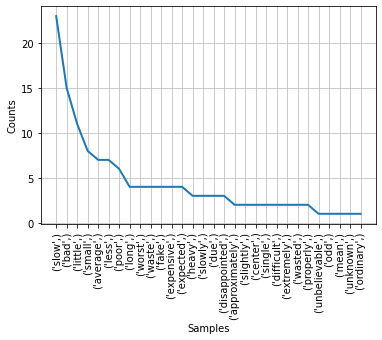

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [528]:
ngram_freq.plot(30)

In [529]:
pw = Counter(psenti)
T = len(psenti) + len(nsenti)
pw  
T
dfp = pd.DataFrame.from_dict(pw, orient='index').reset_index()
dfp.columns = ["PosWords", "Frequency"]
dfp["Probability"] = dfp["Frequency"]/T
dfp.sort_values( by="Frequency", ascending=False, inplace = True)
pdf = dfp[dfp['Frequency'] > 1]
pdf

,PosWords,Frequency,Probability
1,good,231,0.276316
4,nice,67,0.080144
23,fast,24,0.028708
3,best,23,0.027512
0,excellent,22,0.026316
10,awesome,18,0.021531
34,better,16,0.019139
15,great,16,0.019139
17,much,14,0.016746
52,ok,12,0.014354


In [530]:
nw = Counter(nsenti)
T = len(psenti) + len(nsenti)
 
dfn = pd.DataFrame.from_dict(nw, orient='index').reset_index()
dfn.columns = ["NegWords", "Frequency"]
dfn["Probability"] = dfn["Frequency"]/T
dfn.sort_values( by="Frequency", ascending=False, inplace = True)
ndf = dfn[dfn['Frequency'] >= 1]
ndf

,NegWords,Frequency,Probability
4,slow,23,0.027512
14,bad,15,0.017943
10,little,11,0.013158
2,small,8,0.009569
22,less,7,0.008373
15,average,7,0.008373
12,poor,6,0.007177
28,expensive,4,0.004785
13,fake,4,0.004785
0,long,4,0.004785


In [531]:
data_pos  = df[df['Sentiment'] == 1]

In [532]:
data_neg  = df[df['Sentiment'] == 0]

In [533]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

In [534]:
# dividing the data set for model building and validation 
X_train, X_hold = train_test_split(data_pos, test_size=0.2, random_state=111)

In [535]:
# Vectorizing and fitting the model. Note that while vectorizing, we are not taking those words that appear in less than 50 documents.
# We are not taking those words that appear in more than 75% of documents. We are only considering 6000 words in the vectorspace.
vectorizer_tf = TfidfVectorizer(max_df=0.95, min_df=2, max_features=6000)
tf_vectors = vectorizer_tf.fit_transform(X_train.Review_1) 

In [536]:
# LatentDirichletAllocation function will find the pronciple direction for each document  
lda = decomposition.LatentDirichletAllocation(n_components=6, max_iter=5, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

In [537]:
# score of each document in the 6 principle directions 
W1

array([[0.04917895, 0.04918819, 0.75190881, 0.04943321, 0.04915984,
        0.051131  ],
       [0.08350006, 0.58258202, 0.08351245, 0.08344326, 0.08349343,
        0.08346878],
       [0.083351  , 0.08334062, 0.08338456, 0.08352842, 0.08339341,
        0.58300199],
       ...,
       [0.08346787, 0.58269185, 0.083346  , 0.0837969 , 0.08335079,
        0.08334659],
       [0.04767213, 0.04651045, 0.04655745, 0.04678437, 0.76598293,
        0.04649268],
       [0.06543096, 0.06590791, 0.06537948, 0.67251108, 0.06537831,
        0.06539227]])

In [538]:
# Collecting 6 most frequent words for each of the 6 priciple directions. From these words, one have to understand what topic 
# name should be appropriate for each topic. 
num_words=20

vocab = np.array(vectorizer_tf.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

C:\Users\dishu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [539]:
topics

['excellent one ok good product dont use osm issue model pendrive looking bit satisfied fast best 64gb better itit long',
 'good buy gb drive metal superb storage great use actual pen strong also speed usb performance design device price wonderful',
 'super usb times speed pendrive working best 31 metallic purpose go fast nice 10 read much 30 really system sony',
 'product good quality money value speed nice hp awesome transfer best pendrive like amazon use easy looks storage gb durable',
 'data storage fast transfer capacity high products pendrive okay price excellent speed work space look back nyc useful nice reading',
 'nice awesome work design nyc pendrive drive performance build best working strong pen quality saving songs 32gb copying much metal']

In [540]:
#topics
#Topic 1 - Value for money
#Topic 2 - Quality
#Topic 3 - Satisfaction
#Topic 4 - durability
#Topic 5 - Build quality
#Topic 6 - Speed



In [541]:
# Identifying dominant topic for each document 
#Creates a list of column names for a dataframe that will store the results of a topic modeling analysis. The number of columns in the dataframe is determined by the number of topics identified in the analysis. The code uses a list comprehension to generate column names in the format "Topic0", "Topic1", "Topic2", etc. The variable "lda" is assumed to contain a topic model object with an attribute "n_components" that stores the number of topics.
#Creates a list of document names for the same dataframe. The number of document names is determined by the length of a pandas dataframe "X_train" and the naming format is "Doc0", "Doc1", "Doc2", etc.
#Creates a pandas dataframe "Review_doc_topic" with the topic modeling results. The dataframe is initialized with values from a numpy array "W1" that contains the topic weights for each document. The column names and index values are set using the lists created in steps 1 and 2.
#Determines the dominant topic for each document by finding the index of the highest value in each row of the "Review_doc_topic" dataframe (using the numpy function "argmax"). This index corresponds to the topic with the highest weight for that document. The dominant topic is stored in a new column "dominant_topic" in the "Review_doc_topic" dataframe.

colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_train.Review_1))]
Review_doc_topic = pd.DataFrame(np.round(W1, 3), columns=colnames, index=docnames)
significant_topic = np.argmax(Review_doc_topic.values, axis=1)
Review_doc_topic['dominant_topic'] = significant_topic

In [542]:
Review_doc_topic.head(5)


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,dominant_topic
Doc0,0.049,0.049,0.752,0.049,0.049,0.051,2
Doc1,0.084,0.583,0.084,0.083,0.083,0.083,1
Doc2,0.083,0.083,0.083,0.084,0.083,0.583,5
Doc3,0.755,0.049,0.049,0.049,0.049,0.049,0
Doc4,0.083,0.083,0.083,0.084,0.083,0.583,5


In [543]:
significant_topic

array([2, 1, 5, 0, 5, 1, 3, 3, 3, 1, 3, 5, 3, 5, 2, 1, 3, 0, 1, 4, 5, 3,
       3, 1, 3, 3, 3, 5, 3, 0, 5, 5, 3, 3, 3, 4, 5, 0, 0, 4, 0, 3, 3, 3,
       0, 1, 3, 0, 3, 2, 1, 3, 5, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 0, 1,
       3, 0, 1, 1, 2, 1, 3, 5, 2, 3, 1, 0, 3, 3, 3, 0, 4, 5, 3, 3, 3, 3,
       1, 4, 1, 1, 3, 5, 3, 1, 0, 3, 3, 4, 0, 0, 3, 3, 0, 1, 0, 3, 3, 3,
       4, 3, 1, 3, 3, 3, 4, 3, 4, 4, 0, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3,
       3, 1, 3, 3, 0, 1, 3, 4, 0, 1, 0, 3, 4, 0, 1, 3, 2, 0, 0, 1, 1, 4,
       3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 5, 5, 5, 3, 5, 3, 3, 2, 0, 1, 3, 0,
       4, 3, 0, 3, 3, 3, 5, 5, 5, 5, 0, 4, 3, 3, 1, 2, 3, 0, 1, 0, 3, 2,
       3, 3, 3, 4, 1, 3, 3, 3, 1, 1, 0, 0, 5, 3, 3, 1, 4, 3, 1, 1, 3, 3,
       0, 1, 4, 1, 5, 0, 0, 4, 5, 1, 3, 1, 2, 3, 3, 2, 3, 3, 2, 3, 0, 2,
       1, 3, 3, 5, 1, 3, 1, 1, 3, 0, 1, 3, 1, 1, 3, 3, 5, 4, 3, 1, 3, 3,
       4, 4, 0, 3, 1, 3, 5, 3, 1, 2, 1, 3, 3, 1, 3, 1, 3, 3, 1, 3, 1, 5,
       3, 3, 3, 0, 3, 1, 4, 5, 5, 0, 3, 0, 3, 3, 3,

In [544]:
# Just checking if documents are align with the topics 
X_train['Topic'] = significant_topic

In [545]:
X_train

,Rating,Date,Review,Sentiment,Review_1,Topic
163,4,1-Nov-2020,"It is nice, premium, small, metallic body but ...",1.0,nice premium small metallic body heatted times,2
365,5,1-Jul-2021,Superb,1.0,superb,1
378,4,12-Jan-2020,Nice,1.0,nice,5
103,5,9-Feb-2022,It’s fast but slightly difference between with...,1.0,fast slightly difference ssd hdd high efficien...,0
139,5,2-Apr-2022,Very Nice,1.0,nice,5
...,...,...,...,...,...,...
385,4,14-Dec-2019,Very good,1.0,good,1
128,5,21-Jul-2020,The issues with flash drives is heat dissipati...,1.0,issues flash drives heat dissipation affects l...,3
301,4,9-Feb-2020,It is very good...,1.0,good,1
521,5,25-Sep-2019,This is one of the excellent pendrive in marke...,1.0,one excellent pendrive market high reading tra...,4


In [546]:
# Check how good our model for unknown data 
WHold = lda.transform(vectorizer_tf.transform(X_hold.Review_1[:5]))

In [547]:
# Identifying dominant topic for holdout documents 
# Identifying dominant topic for each document 
#Creates a list of column names for a dataframe that will store the results of a topic modeling analysis. The number of columns in the dataframe is determined by the number of topics identified in the analysis. The code uses a list comprehension to generate column names in the format "Topic0", "Topic1", "Topic2", etc. The variable "lda" is assumed to contain a topic model object with an attribute "n_components" that stores the number of topics.
#Creates a list of document names for the same dataframe. The number of document names is determined by the length of a pandas dataframe "X_train" and the naming format is "Doc0", "Doc1", "Doc2", etc.
#Creates a pandas dataframe "Review_doc_topic" with the topic modeling results. The dataframe is initialized with values from a numpy array "W1" that contains the topic weights for each document. The column names and index values are set using the lists created in steps 1 and 2.
#Determines the dominant topic for each document by finding the index of the highest value in each row of the "Review_doc_topic" dataframe (using the numpy function "argmax"). This index corresponds to the topic with the highest weight for that document. The dominant topic is stored in a new column "dominant_topic" in the "Review_doc_topic" dataframe.

colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_hold.Review_1[:5]))]
Review_doc_topic = pd.DataFrame(np.round(WHold, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(Review_doc_topic.values, axis=1)
Review_doc_topic['dominant_topic'] = significant_topic

In [548]:
Review_doc_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,dominant_topic
Doc0,0.08,0.08,0.08,0.58,0.08,0.08,3
Doc1,0.07,0.07,0.07,0.65,0.07,0.07,3
Doc2,0.08,0.58,0.08,0.08,0.08,0.08,1
Doc3,0.04,0.35,0.04,0.49,0.04,0.04,3
Doc4,0.17,0.17,0.17,0.17,0.17,0.17,0


In [549]:
significant_topic

array([3, 3, 1, 3, 0], dtype=int64)

In [550]:
X_hold.head()

,Rating,Date,Review,Sentiment,Review_1
202,4,10-Nov-2020,Better than others,1.0,better others
18,5,20-Jan-2023,I M VERY GALED IF PRODUCT IS VERY GOOD,1.0,galed product good
347,3,15-Jul-2020,that's good,1.0,thats good
180,5,2-May-2021,Excellent pendrive. Very good speed. Look & fe...,1.0,excellent pendrive good speed look feel good s...
344,5,30-May-2021,Garda macha diya,1.0,garda macha diya


In [551]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 2),min_df=5, max_df=.95)

tfidf_matrix = tfidf.fit_transform(data_pos.Review_1)
tfidf_matrix

<431x103 sparse matrix of type '<class 'numpy.float64'>'
	with 1535 stored elements in Compressed Sparse Row format>

In [552]:
tfidf_matrix = tfidf_matrix.toarray()

In [553]:
from sklearn.cluster import KMeans
#This line initializes an empty list that will be used to store the values of the sum of squared distances of samples to their closest cluster center (also known as the "inertia") for each value of k that is tested
css = [] 
# This line creates a loop that iterates through a range of values of k (the number of clusters), from 2 to 9 (inclusive).
for i in range(2, 10): 
    ##This line creates an instance of the k-means algorithm with the specified number of clusters i, as well as some other hyperparameters. Specifically, the max_iter parameter sets the maximum number of iterations for each run of the k-means algorithm, the n_init parameter sets the number of times the k-means algorithm will be run with different random initializations, and the random_state parameter ensures that the random initialization is reproducible. The fit() method is then called on the TFIDF matrix tfidf_matrix to cluster the documents.
    kmeans = KMeans(n_clusters=i, max_iter=100, n_init=10, random_state=42).fit(tfidf_matrix)
    css.append(kmeans.inertia_)

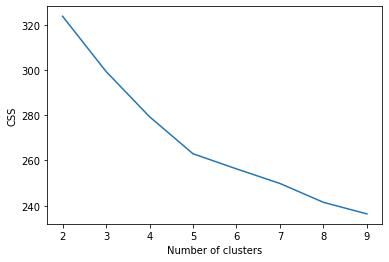

In [554]:
#Plotting between the number of clusters and the CSS to get the optimum number of clusters
import matplotlib.pyplot as plt
plt.plot(range(2, 10), css)
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

In [555]:
data_pos

,Rating,Date,Review,Sentiment,Review_1
1,4,3-Feb-2023,Excellent product 👍,1.0,excellent product
2,4,26-Jan-2023,It's finishing and quality including brand......,1.0,finishing quality including brand
3,4,13-Jan-2023,It's good ... The speed is amazing,1.0,good speed amazing
5,4,21-Jan-2023,Good looking and premium to use,1.0,good looking premium use
7,5,16-Feb-2023,Very good product quantity price the best,1.0,good product quantity price best
...,...,...,...,...,...
604,5,2-Mar-2020,Worth buying .. Value.for money,1.0,worth buying valuefor money
605,5,1-Mar-2020,Good and faster than other,1.0,good faster
606,5,29-Feb-2020,Hp796L seriously awesome pen drive,1.0,hp796l seriously awesome pen drive
607,5,17-Nov-2019,"Good product , capacity of 30 gb.Timely delivered",1.0,good product capacity 30 gbtimely delivered


In [556]:
NUM_CLUSTERS = 4
km2 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=1000, n_init=15, random_state=42).fit(tfidf_matrix)
# Adding Cluster levels in the original dataframe 
data_pos['kmeans_cluster'] = km2.labels_
#Review.head(10)

Reveiw_clusters = (data_pos[['Rating', 'kmeans_cluster', 'Review_1']].groupby('kmeans_cluster').head(100))
#movie_clusters = movie_clusters.copy(deep=True)

feature_names = tfidf.get_feature_names()
topn_features = 8
ordered_centroids = km2.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    Review_1 = Reveiw_clusters[Reveiw_clusters['kmeans_cluster'] == cluster_num].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #1
Key Features: ['good', 'speed', 'product', 'value', 'money', 'quality', 'storage', 'value money']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['good', 'good product', 'speed', 'pendrive', 'value money', 'transfer', 'data', 'hp']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['nice', 'nice product', 'product', 'design', 'speed', 'durable', 'using', 'working']
--------------------------------------------------------------------------------
CLUSTER #4
Key Features: ['good product', 'product', 'good', 'price', 'amazon', 'hp', 'capacity', 'value money']
--------------------------------------------------------------------------------


C:\Users\dishu\AppData\Local\Temp\ipykernel_28404\917219252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pos['kmeans_cluster'] = km2.labels_
C:\Users\dishu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [557]:
#Cluster1 - Value
#Cluster2 - Satisfaction
#Cluster3 - Speed
#Cluster4 - quality


In [558]:
# dividing the data set for model building and validation 
X_train_1, X_hold_1 = train_test_split(data_neg, test_size=0.4, random_state=111)

In [559]:
# Vectorizing and fitting the model. Note that while vectorizing, we are not taking those words that appear in less than 50 documents.
# We are not taking those words that appear in more than 75% of documents. We are only considering 6000 words in the vectorspace.
vectorizer_tf = TfidfVectorizer(max_df=0.95, min_df=2, max_features=6000)
tf_vectors = vectorizer_tf.fit_transform(X_train_1.Review_1) 

In [560]:
# LatentDirichletAllocation function will find the pronciple direction for each document  
lda = decomposition.LatentDirichletAllocation(n_components=3, max_iter=5, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

In [561]:
# score of each document in the 3 principle directions 
W1

array([[0.11720841, 0.11496301, 0.76782858],
       [0.14808917, 0.71326264, 0.13864819],
       [0.12720245, 0.12487554, 0.74792201],
       [0.79988492, 0.10162935, 0.09848573],
       [0.14103659, 0.71912173, 0.13984168],
       [0.10038788, 0.79905199, 0.10056013],
       [0.71602384, 0.14799877, 0.13597739],
       [0.12623578, 0.73916601, 0.13459821],
       [0.11822482, 0.76541717, 0.116358  ],
       [0.08009969, 0.08284453, 0.83705578],
       [0.08748403, 0.095813  , 0.81670297],
       [0.15415271, 0.17336833, 0.67247897],
       [0.12340896, 0.12858832, 0.74800273],
       [0.23316184, 0.18910362, 0.57773454],
       [0.09766013, 0.80529738, 0.09704249],
       [0.33333333, 0.33333333, 0.33333333],
       [0.1374404 , 0.13765164, 0.72490797],
       [0.14689844, 0.68362613, 0.16947543],
       [0.10647839, 0.11271841, 0.7808032 ],
       [0.12717129, 0.74397159, 0.12885712],
       [0.1562301 , 0.15598697, 0.68778294],
       [0.101878  , 0.10400993, 0.79411207],
       [0.

In [562]:
# Collecting 3 most frequent words for each of the 6 priciple directions. From these words, one have to understand what topic 
# name should be appropriate for each topic. 
num_words=20

vocab = np.array(vectorizer_tf.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [563]:
topics

['product please drive data heated buy company files speed working read center change warm pen system hp bad metallic pendrive',
 'good usb use drive pen speed ok laptop problem better price high port heating fine pendrive hp dont mai storage',
 'gb speed slow transfer pendrive 64 storage flash 20 capacity like data 31 expensive usb poor nice drive really showing']

In [564]:
#topics
#Topic 1 - Slow
#Topic 2 - storage
#Topic 3 - wrong product

In [565]:
# Identifying dominant topic for each document 
#Creates a list of column names for a dataframe that will store the results of a topic modeling analysis. The number of columns in the dataframe is determined by the number of topics identified in the analysis. The code uses a list comprehension to generate column names in the format "Topic0", "Topic1", "Topic2", etc. The variable "lda" is assumed to contain a topic model object with an attribute "n_components" that stores the number of topics.
#Creates a list of document names for the same dataframe. The number of document names is determined by the length of a pandas dataframe "X_train" and the naming format is "Doc0", "Doc1", "Doc2", etc.
#Creates a pandas dataframe "Review_doc_topic" with the topic modeling results. The dataframe is initialized with values from a numpy array "W1" that contains the topic weights for each document. The column names and index values are set using the lists created in steps 1 and 2.
#Determines the dominant topic for each document by finding the index of the highest value in each row of the "Review_doc_topic" dataframe (using the numpy function "argmax"). This index corresponds to the topic with the highest weight for that document. The dominant topic is stored in a new column "dominant_topic" in the "Review_doc_topic" dataframe.

colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_train_1.Review_1))]
Review_doc_topic = pd.DataFrame(np.round(W1, 3), columns=colnames, index=docnames)
significant_topic = np.argmax(Review_doc_topic.values, axis=1)
Review_doc_topic['dominant_topic'] = significant_topic

In [566]:
Review_doc_topic.head(5)

,Topic0,Topic1,Topic2,dominant_topic
Doc0,0.117,0.115,0.768,2
Doc1,0.148,0.713,0.139,1
Doc2,0.127,0.125,0.748,2
Doc3,0.800,0.102,0.098,0
Doc4,0.141,0.719,0.140,1


In [567]:
significant_topic

array([2, 1, 2, 0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0], dtype=int64)

In [568]:
# Just checking if documents are align with the topics 
X_train_1['Topic'] = significant_topic
X_train_1

,Rating,Date,Review,Sentiment,Review_1,Topic
533,2,7-Sep-2020,My money is watse for ordered this .It is not ...,0.0,money watse ordered 64 gb pendrive,2
509,3,5-Sep-2019,An average pen drive,0.0,average pen drive,1
234,1,8-Sep-2022,Storage received 124gb instead of 128gb,0.0,storage received 124gb instead 128gb,2
397,2,19-Jan-2020,Write speed is as low as usb 2.0 max you'll hi...,0.0,write speed low usb 20 max youll hit 1820 mbps...,0
195,3,16-Mar-2021,"As soon as you plug pendrir in laptop, it star...",0.0,soon plug pendrir laptop starts heating,1
...,...,...,...,...,...,...
252,3,12-Aug-2020,Very important note. It's quite large. And not...,0.0,important note quite large handy gets really hot,2
75,1,23-Dec-2022,"This is a fake product. I checked with HP, whi...",0.0,fake product checked hp recognised also device...,0
319,2,22-Aug-2021,HP is good in PC but not good in storage devices.,0.0,hp good pc good storage devices,1
400,3,21-Oct-2019,I got only 28 gb pen drive. This is not fare A...,0.0,got 28 gb pen drive fare amazon,1


In [569]:
# Check how good our model for unknown data 
WHold = lda.transform(vectorizer_tf.transform(X_hold_1.Review_1[:5]))

In [570]:
# Identifying dominant topic for holdout documents 
# Identifying dominant topic for each document 
#Creates a list of column names for a dataframe that will store the results of a topic modeling analysis. The number of columns in the dataframe is determined by the number of topics identified in the analysis. The code uses a list comprehension to generate column names in the format "Topic0", "Topic1", "Topic2", etc. The variable "lda" is assumed to contain a topic model object with an attribute "n_components" that stores the number of topics.
#Creates a list of document names for the same dataframe. The number of document names is determined by the length of a pandas dataframe "X_train" and the naming format is "Doc0", "Doc1", "Doc2", etc.
#Creates a pandas dataframe "Review_doc_topic" with the topic modeling results. The dataframe is initialized with values from a numpy array "W1" that contains the topic weights for each document. The column names and index values are set using the lists created in steps 1 and 2.
#Determines the dominant topic for each document by finding the index of the highest value in each row of the "Review_doc_topic" dataframe (using the numpy function "argmax"). This index corresponds to the topic with the highest weight for that document. The dominant topic is stored in a new column "dominant_topic" in the "Review_doc_topic" dataframe.

colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_hold_1.Review_1[:5]))]
Review_doc_topic = pd.DataFrame(np.round(WHold, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(Review_doc_topic.values, axis=1)
Review_doc_topic['dominant_topic'] = significant_topic

In [571]:
Review_doc_topic

,Topic0,Topic1,Topic2,dominant_topic
Doc0,0.12,0.77,0.11,1
Doc1,0.63,0.21,0.16,0
Doc2,0.14,0.14,0.72,2
Doc3,0.16,0.68,0.16,1
Doc4,0.18,0.63,0.19,1


In [572]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 2),min_df=2, max_df=.90)

tfidf_matrix = tfidf.fit_transform(data_neg.Review_1)
tfidf_matrix

<170x376 sparse matrix of type '<class 'numpy.float64'>'
	with 1562 stored elements in Compressed Sparse Row format>

In [573]:
tfidf_matrix = tfidf_matrix.toarray()

In [574]:
from sklearn.cluster import KMeans
#This line initializes an empty list that will be used to store the values of the sum of squared distances of samples to their closest cluster center (also known as the "inertia") for each value of k that is tested
css = [] 
# This line creates a loop that iterates through a range of values of k (the number of clusters), from 2 to 9 (inclusive).
for i in range(2, 10): 
    ##This line creates an instance of the k-means algorithm with the specified number of clusters i, as well as some other hyperparameters. Specifically, the max_iter parameter sets the maximum number of iterations for each run of the k-means algorithm, the n_init parameter sets the number of times the k-means algorithm will be run with different random initializations, and the random_state parameter ensures that the random initialization is reproducible. The fit() method is then called on the TFIDF matrix tfidf_matrix to cluster the documents.
    kmeans = KMeans(n_clusters=i, max_iter=100, n_init=10, random_state=42).fit(tfidf_matrix)
    css.append(kmeans.inertia_)

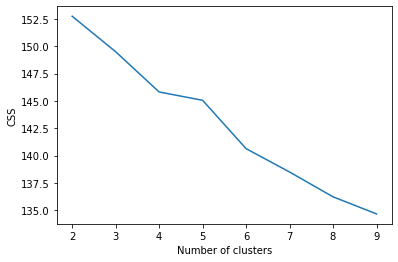

In [575]:
#Plotting between the number of clusters and the CSS to get the optimum number of clusters
import matplotlib.pyplot as plt
plt.plot(range(2, 10), css)
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

In [576]:
NUM_CLUSTERS = 3
km2 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(tfidf_matrix)
# Adding Cluster levels in the original dataframe 
data_neg['kmeans_cluster'] = km2.labels_
#Review.head(10)

Reveiw_clusters = (data_neg[['Rating', 'kmeans_cluster', 'Review_1']].groupby('kmeans_cluster').head(10))
#movie_clusters = movie_clusters.copy(deep=True)

feature_names = tfidf.get_feature_names()
topn_features = 10
ordered_centroids = km2.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    Review_1 = Reveiw_clusters[Reveiw_clusters['kmeans_cluster'] == cluster_num].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #1
Key Features: ['gb', '64 gb', '64', 'capacity', '128', '128 gb', 'storage', 'pendrive', 'gb pendrive', 'mai']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['drive', 'pen', 'pen drive', 'working', 'flash', 'flash drive', 'data', 'hp', 'amazon', 'speed']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['speed', 'good', 'slow', 'product', 'usb', 'pendrive', 'ok', 'like', 'transfer', 'buy']
--------------------------------------------------------------------------------


C:\Users\dishu\AppData\Local\Temp\ipykernel_28404\1314002506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_neg['kmeans_cluster'] = km2.labels_
C:\Users\dishu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [577]:
#Topics

#Cluster1 - Storage
#Cluster2 - Wrong product
#Cluster3 - Speed
 

In [578]:
data_neg

,Rating,Date,Review,Sentiment,Review_1,kmeans_cluster
0,4,14-Feb-2023,Its not 128gb its 115gb,0.0,128gb 115gb,2
4,4,3-Jan-2023,Like but price can be low,0.0,like price low,2
14,3,5-Jan-2023,Product and product quality is nice but the st...,0.0,product product quality nice storage capacity ...,2
15,5,31-Jan-2023,It's good but storage scammed,0.0,good storage scammed,2
27,3,9-Dec-2022,Not good,0.0,good,2
...,...,...,...,...,...,...
596,1,24-Feb-2022,Extremely sliw spoed. @ 1mbps.,0.0,extremely sliw spoed 1mbps,2
597,2,26-Jan-2020,its sturdy and looking good but in terms of tr...,0.0,sturdy looking good terms transferring datait ...,2
600,1,4-Sep-2020,"This Flash drive has no flash, it gives only ...",0.0,flash drive flash gives 4 5 mbps write speed e...,1
601,1,7-Jul-2021,This flesh drive does not support the reading ...,0.0,flesh drive support reading writing speed clai...,1


In [579]:
#Phase 1 - Reporting the Findings
'''In Topic modelling the polarity value is positive, therefore we can conclude that the product has an positive sentiment amongst
the consumners. From N- gram model we have identified that the most frequent reviews are good, nice. Therfore the overall 
sentiment about the product is positve, In the case of negative sentiments, we got reivews such as the dirty and damaged and 
small.'''

'''In topic modelling of the positive and the negative sentiments, the topic we found about the postive sentiments are 
#Topic 1 - Fragnance
#Topic 2 - Refreshness
#Topic 3 - Value for money
#Topic 4 - Cleanliness
#Topic 5 - Stain remover
#Topic 6 - Machine Friendly
#Topic 7 - Dirt Remover

the topic we found about the Negative sentiments are 

#topics
#Topic 1 - packaging issues
#Topic 2 - low value for money
#Topic 3 - low quality
#Topic 4 - poor porduct
#Topic 5 - Smelly
#Topic 6 - Half filled
#Topic 7 - Damaged


From the cluster analysis we got the clusters of Positive Sentiments are

#Cluster1 - Fragnance Features
#Cluster2 - Easy Use Features
#Cluster3 - Stain Removing Features
#Cluster4 - Budgeting Features
#Cluster5 - Smell and value Features

From the cluster analysis we got the clusters of Negative Sentiments are

#Cluster1 - Damaged
#Cluster2 - Low Quality
#Cluster3 - Packaging
#Cluster4 - Cost

We can conlcude that the product provides lot of freshness and refreshness to the clothes while there are issues with the
packaging, price and the quantity provided.

One Suggestion can be use air tight packaging and give discount to the customers
Another suggestion is to increase the quantity and provide indian labels.

'''


'In topic modelling of the positive and the negative sentiments, the topic we found about the postive sentiments are \n#Topic 1 - Fragnance\n#Topic 2 - Refreshness\n#Topic 3 - Value for money\n#Topic 4 - Cleanliness\n#Topic 5 - Stain remover\n#Topic 6 - Machine Friendly\n#Topic 7 - Dirt Remover\n\nthe topic we found about the Negative sentiments are \n\n#topics\n#Topic 1 - packaging issues\n#Topic 2 - low value for money\n#Topic 3 - low quality\n#Topic 4 - poor porduct\n#Topic 5 - Smelly\n#Topic 6 - Half filled\n#Topic 7 - Damaged\n\n\nFrom the cluster analysis we got the clusters of Positive Sentiments are\n\n#Cluster1 - Fragnance Features\n#Cluster2 - Easy Use Features\n#Cluster3 - Stain Removing Features\n#Cluster4 - Budgeting Features\n#Cluster5 - Smell and value Features\n\nFrom the cluster analysis we got the clusters of Negative Sentiments are\n\n#Cluster1 - Damaged\n#Cluster2 - Low Quality\n#Cluster3 - Packaging\n#Cluster4 - Cost\n\nWe can conlcude that the product provides lot

# Phase 2

In [580]:
df

,Rating,Date,Review,Sentiment,Review_1
0,4,14-Feb-2023,Its not 128gb its 115gb,0.0,128gb 115gb
1,4,3-Feb-2023,Excellent product 👍,1.0,excellent product
2,4,26-Jan-2023,It's finishing and quality including brand......,1.0,finishing quality including brand
3,4,13-Jan-2023,It's good ... The speed is amazing,1.0,good speed amazing
4,4,3-Jan-2023,Like but price can be low,0.0,like price low
...,...,...,...,...,...
604,5,2-Mar-2020,Worth buying .. Value.for money,1.0,worth buying valuefor money
605,5,1-Mar-2020,Good and faster than other,1.0,good faster
606,5,29-Feb-2020,Hp796L seriously awesome pen drive,1.0,hp796l seriously awesome pen drive
607,5,17-Nov-2019,"Good product , capacity of 30 gb.Timely delivered",1.0,good product capacity 30 gbtimely delivered


In [581]:
# convert the DOB column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [582]:
# sort the dataframe by the DOB column
df = df.sort_values(by='Date',ascending=False)


In [583]:
# separate the first 25% of the data
split_idx = int(len(df) * 0.25)
data_recent = df.iloc[:split_idx]
len(data_recent)

150

In [584]:
data_recent.head()

,Rating,Date,Review,Sentiment,Review_1
7,5,2023-02-16,Very good product quantity price the best,1.0,good product quantity price best
9,5,2023-02-16,Good,1.0,good
8,5,2023-02-15,Transfer speed is good. Go ahead.,1.0,transfer speed good go ahead
0,4,2023-02-14,Its not 128gb its 115gb,0.0,128gb 115gb
33,2,2023-02-13,This pen drive is corrupted within 2 years. My...,0.0,pen drive corrupted within 2 years data lose


In [585]:
# Convert the 'B' column to an array
Review_array = data_recent['Review_1'].values

# Print the array
print(Review_array)

['good product quantity price best' 'good' 'transfer speed good go ahead'
 '128gb 115gb' 'pen drive corrupted within 2 years data lose'
 'pens drive best'
 'ordered set 3 pendrives pendrive slow even usb 20 pendrive reads data faster usb 31 really feel like worst purchase selection dont like buy'
 'good product amazon deeal' '1'
 'dont buy waste money slow copy paste transfers kb instead mb' 'dont buy'
 'bad quality print body 64gb internal capacity 32gb' 'excellent product'
 'good product value money' 'good storage scammed'
 'finishing quality including brand' 'using month issues' 'corrupted'
 'good looking premium use' 'galed product good' 'data storage excellent'
 'always useful' 'good speed amazing' 'good'
 'mistake washing machine washed still working' 'wrost product ever'
 'good product'
 'product product quality nice storage capacity good 64gb missed 7gb received 57gb'
 'like price low' 'good woking super' ''
 'fake product checked hp recognised also device write protected first

In [586]:
# Convert the array to a string
Review_str = '. \n'.join(map(str, Review_array))

# Print the string
print(Review_str)

good product quantity price best. 
good. 
transfer speed good go ahead. 
128gb 115gb. 
pen drive corrupted within 2 years data lose. 
pens drive best. 
ordered set 3 pendrives pendrive slow even usb 20 pendrive reads data faster usb 31 really feel like worst purchase selection dont like buy. 
good product amazon deeal. 
1. 
dont buy waste money slow copy paste transfers kb instead mb. 
dont buy. 
bad quality print body 64gb internal capacity 32gb. 
excellent product. 
good product value money. 
good storage scammed. 
finishing quality including brand. 
using month issues. 
corrupted. 
good looking premium use. 
galed product good. 
data storage excellent. 
always useful. 
good speed amazing. 
good. 
mistake washing machine washed still working. 
wrost product ever. 
good product. 
product product quality nice storage capacity good 64gb missed 7gb received 57gb. 
like price low. 
good woking super. 
. 
fake product checked hp recognised also device write protected first use please avoid

In [587]:
blob = TextBlob(Review_str)
blob.sentiment

Sentiment(polarity=0.32149863945578255, subjectivity=0.5827776556776553)

In [588]:
#Display all sentences separately 
blob.sentences

[Sentence("good product quantity price best."),
 Sentence("good."),
 Sentence("transfer speed good go ahead."),
 Sentence("128gb 115gb."),
 Sentence("pen drive corrupted within 2 years data lose."),
 Sentence("pens drive best."),
 Sentence("ordered set 3 pendrives pendrive slow even usb 20 pendrive reads data faster usb 31 really feel like worst purchase selection dont like buy."),
 Sentence("good product amazon deeal."),
 Sentence("1. 
 dont buy waste money slow copy paste transfers kb instead mb."),
 Sentence("dont buy."),
 Sentence("bad quality print body 64gb internal capacity 32gb."),
 Sentence("excellent product."),
 Sentence("good product value money."),
 Sentence("good storage scammed."),
 Sentence("finishing quality including brand."),
 Sentence("using month issues."),
 Sentence("corrupted."),
 Sentence("good looking premium use."),
 Sentence("galed product good."),
 Sentence("data storage excellent."),
 Sentence("always useful."),
 Sentence("good speed amazing."),
 Sentence("

In [589]:
# List of all sentiment words 
blist = blob.sentiment_assessments.assessments
blist

[(['good'], 0.7, 0.6000000000000001, None),
 (['best'], 1.0, 0.3, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['best'], 1.0, 0.3, None),
 (['slow'], -0.30000000000000004, 0.39999999999999997, None),
 (['really'], 0.2, 0.2, None),
 (['worst'], -1.0, 1.0, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['waste'], -0.2, 0.0, None),
 (['slow'], -0.30000000000000004, 0.39999999999999997, None),
 (['bad'], -0.6999999999999998, 0.6666666666666666, None),
 (['internal'], 0.0, 0.0, None),
 (['excellent'], 1.0, 1.0, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['excellent'], 1.0, 1.0, None),
 (['useful'], 0.3, 0.0, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['amazing'], 0.6000000000000001, 0.9, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['good'], 0.7, 0.6000000000000001, None),
 ([

In [590]:
psentence = []
for p in range(len(blob.sentences)):
    if blob.sentences[p].sentiment_assessments.assessments != []:
        pl = blob.sentences[p].sentiment_assessments.assessments[0][1]
        if pl > 0:
            psentence.append(blob.sentences[p])
            
print(psentence[0:25])

[Sentence("good product quantity price best."), Sentence("good."), Sentence("transfer speed good go ahead."), Sentence("pens drive best."), Sentence("good product amazon deeal."), Sentence("excellent product."), Sentence("good product value money."), Sentence("good storage scammed."), Sentence("good looking premium use."), Sentence("galed product good."), Sentence("data storage excellent."), Sentence("always useful."), Sentence("good speed amazing."), Sentence("good."), Sentence("good product."), Sentence("product product quality nice storage capacity good 64gb missed 7gb received 57gb."), Sentence("good woking super. 
. 
fake product checked hp recognised also device write protected first use please avoid metallic product buy something else."), Sentence("super."), Sentence("good product."), Sentence("good working product long life usesable storage product."), Sentence("good."), Sentence("working fine good speed."), Sentence("thank amazon service good delivery guy."), Sentence("awesome

In [591]:
# Number of positive sentences 
len(psentence)

86

In [592]:
senti_pos = []
for i in range(len(blist)):
    plt = blist[i][1]
    if plt > 0:
        senti_pos.append(blist[i][0])

senti_pos
#len(senti_pos)

[['good'],
 ['best'],
 ['good'],
 ['good'],
 ['best'],
 ['really'],
 ['good'],
 ['excellent'],
 ['good'],
 ['good'],
 ['good'],
 ['good'],
 ['excellent'],
 ['useful'],
 ['good'],
 ['amazing'],
 ['good'],
 ['good'],
 ['nice'],
 ['good'],
 ['good'],
 ['super'],
 ['first'],
 ['super'],
 ['good'],
 ['good'],
 ['good'],
 ['fine'],
 ['good'],
 ['good'],
 ['awesome'],
 ['smoothly'],
 ['best'],
 ['good'],
 ['good'],
 ['okay'],
 ['great'],
 ['superb'],
 ['good'],
 ['good'],
 ['happy'],
 ['fast'],
 ['love'],
 ['good'],
 ['nice'],
 ['worth'],
 ['complete'],
 ['nice'],
 ['good'],
 ['awesome'],
 ['nice'],
 ['good'],
 ['super'],
 ['easy'],
 ['normal'],
 ['better'],
 ['nice'],
 ['good'],
 ['superb'],
 ['extremely', 'good'],
 ['good'],
 ['awesome'],
 ['good'],
 ['okay'],
 ['superb'],
 ['good'],
 ['nice'],
 ['good'],
 ['good'],
 ['nice'],
 ['nice'],
 ['specially'],
 ['important'],
 ['stylish'],
 ['useful'],
 ['able'],
 ['good'],
 ['easy'],
 ['fast'],
 ['high'],
 ['good'],
 ['good'],
 ['good'],
 ['happy

In [593]:
psenti = []
for i in range(len(senti_pos)):
    plist = senti_pos[i]
    for j in range(len(plist)):
        psenti.append(plist[j])
    
psenti
#len(psenti)

['good',
 'best',
 'good',
 'good',
 'best',
 'really',
 'good',
 'excellent',
 'good',
 'good',
 'good',
 'good',
 'excellent',
 'useful',
 'good',
 'amazing',
 'good',
 'good',
 'nice',
 'good',
 'good',
 'super',
 'first',
 'super',
 'good',
 'good',
 'good',
 'fine',
 'good',
 'good',
 'awesome',
 'smoothly',
 'best',
 'good',
 'good',
 'okay',
 'great',
 'superb',
 'good',
 'good',
 'happy',
 'fast',
 'love',
 'good',
 'nice',
 'worth',
 'complete',
 'nice',
 'good',
 'awesome',
 'nice',
 'good',
 'super',
 'easy',
 'normal',
 'better',
 'nice',
 'good',
 'superb',
 'extremely',
 'good',
 'good',
 'awesome',
 'good',
 'okay',
 'superb',
 'good',
 'nice',
 'good',
 'good',
 'nice',
 'nice',
 'specially',
 'important',
 'stylish',
 'useful',
 'able',
 'good',
 'easy',
 'fast',
 'high',
 'good',
 'good',
 'good',
 'happy',
 'good',
 'fast',
 'able',
 'large',
 'nice',
 'best',
 'good',
 'excellent',
 'nice',
 'easy',
 'good',
 'good',
 'best',
 'first',
 'really',
 'cheap',
 'cheap',

In [594]:
len(set(psenti))

36

In [595]:
ngram_freq = nltk.FreqDist() #WE INITIALIZED A FREQUENCY COUNTER

for ngram in nltk.ngrams(psenti, 1):
    ngram_freq[ngram] += 1
ngram_freq.most_common(297)

[(('good',), 48),
 (('nice',), 11),
 (('best',), 5),
 (('fast',), 4),
 (('excellent',), 3),
 (('useful',), 3),
 (('super',), 3),
 (('awesome',), 3),
 (('superb',), 3),
 (('easy',), 3),
 (('able',), 3),
 (('really',), 2),
 (('first',), 2),
 (('okay',), 2),
 (('happy',), 2),
 (('high',), 2),
 (('cheap',), 2),
 (('amazing',), 1),
 (('fine',), 1),
 (('smoothly',), 1),
 (('great',), 1),
 (('love',), 1),
 (('worth',), 1),
 (('complete',), 1),
 (('normal',), 1),
 (('better',), 1),
 (('extremely',), 1),
 (('specially',), 1),
 (('important',), 1),
 (('stylish',), 1),
 (('large',), 1),
 (('original',), 1),
 (('suitable',), 1),
 (('huge',), 1),
 (('pretty',), 1),
 (('completely',), 1)]

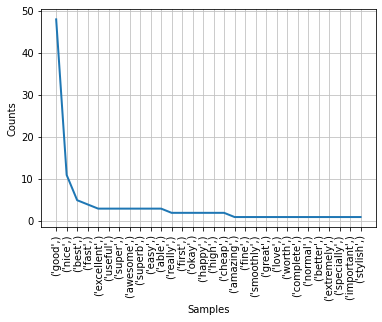

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [596]:
ngram_freq.plot(30)

In [597]:
nsentence = []
for p in range(len(blob.sentences)):
    if blob.sentences[p].sentiment_assessments.assessments != []:
        pl = blob.sentences[p].sentiment_assessments.assessments[0][1]
        if pl < 0:
            nsentence.append(blob.sentences[p])
            
print(nsentence[0:25])

[Sentence("ordered set 3 pendrives pendrive slow even usb 20 pendrive reads data faster usb 31 really feel like worst purchase selection dont like buy."), Sentence("1. 
dont buy waste money slow copy paste transfers kb instead mb."), Sentence("bad quality print body 64gb internal capacity 32gb."), Sentence("movierulz lo movie support waste pen drive."), Sentence("pendrive file transfer speed slow."), Sentence("poor data transfer speed."), Sentence("working easyly workmenship poor."), Sentence("small enough carry pocket appears durable 128gb size unbelievable hp reliable brand happy chosen."), Sentence("copying files stop working giving error bad product serious quality issue expect faulty product quality issue sold amazon brand like hp."), Sentence("dislike also want make recheck hp service center."), Sentence("ismai 3 gb se badi file nahi send kar sakte h pata nahi yeh problem sirf mere wali mai h ya sabhi mai hogi."), Sentence("broken."), Sentence("used pendrive two months working fa

In [598]:
# Number of negative sentiment sentences 
len(nsentence)

21

In [599]:
senti_neg = []
for i in range(len(blist)):
    plt = blist[i][1]
    if plt < 0:
        senti_neg.append(blist[i][0])

In [600]:
# Number of sentences containing negative sentiments 
len(senti_neg)

41

In [601]:
nsenti = []
for i in range(len(senti_neg)):
    nlist = senti_neg[i]
    for j in range(len(nlist)):
        nsenti.append(nlist[j])

In [602]:
len(set(nsenti))

29

In [603]:
ngram_freq = nltk.FreqDist() #WE INITIALIZED A FREQUENCY COUNTER

for ngram in nltk.ngrams(nsenti, 1):
    ngram_freq[ngram] += 1
ngram_freq.most_common(188)

[(('bad',), 5),
 (('slow',), 4),
 (('worst',), 2),
 (('waste',), 2),
 (('fake',), 2),
 (('poor',), 2),
 (('small',), 2),
 (('center',), 2),
 (('long',), 1),
 (('unbelievable',), 1),
 (('serious',), 1),
 (('mere',), 1),
 (('broken',), 1),
 (('heavy',), 1),
 (('slowly',), 1),
 (('extremely',), 1),
 (('slightly',), 1),
 (('mean',), 1),
 (('tight',), 1),
 (('less',), 1),
 (('previous',), 1),
 (('bitter',), 1),
 (('corrupt',), 1),
 (('properly',), 1),
 (('difficult',), 1),
 (('single',), 1),
 (('wasted',), 1),
 (('disappointed',), 1),
 (('closed',), 1)]

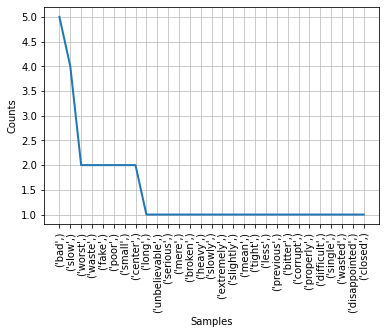

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [604]:
ngram_freq.plot(30)

In [605]:
pw = Counter(psenti)
T = len(psenti) + len(nsenti)
  
dfp = pd.DataFrame.from_dict(pw, orient='index').reset_index()
dfp.columns = ["PosWords", "Frequency"]
dfp["Probability"] = dfp["Frequency"]/T
dfp.sort_values( by="Frequency", ascending=False, inplace = True)
pdf = dfp[dfp['Frequency'] > 1]
pdf

,PosWords,Frequency,Probability
0,good,48,0.296296
6,nice,11,0.067901
1,best,5,0.030864
16,fast,4,0.024691
14,superb,3,0.018519
27,able,3,0.018519
3,excellent,3,0.018519
4,useful,3,0.018519
7,super,3,0.018519
20,easy,3,0.018519


In [606]:
nw = Counter(nsenti)
T = len(psenti) + len(nsenti)
 
dfn = pd.DataFrame.from_dict(nw, orient='index').reset_index()
dfn.columns = ["NegWords", "Frequency"]
dfn["Probability"] = dfn["Frequency"]/T
dfn.sort_values( by="Frequency", ascending=False, inplace = True)
ndf = dfn[dfn['Frequency'] >= 1]
ndf

,NegWords,Frequency,Probability
3,bad,5,0.030864
0,slow,4,0.024691
2,waste,2,0.012346
4,fake,2,0.012346
6,poor,2,0.012346
7,small,2,0.012346
1,worst,2,0.012346
10,center,2,0.012346
23,properly,1,0.006173
20,previous,1,0.006173


In [607]:
data_pos  = data_recent[data_recent['Sentiment'] == 1]

In [608]:
data_neg  = data_recent[data_recent['Sentiment'] == 0]

In [609]:
# dividing the data set for model building and validation 
X_train, X_hold = train_test_split(data_pos, test_size=0.2, random_state=111)

In [610]:
# Vectorizing and fitting the model. Note that while vectorizing, we are not taking those words that appear in less than 50 documents.
# We are not taking those words that appear in more than 75% of documents. We are only considering 6000 words in the vectorspace.
vectorizer_tf = TfidfVectorizer(max_df=0.95, min_df=2, max_features=6000)
tf_vectors = vectorizer_tf.fit_transform(X_train.Review_1) 

In [611]:
# LatentDirichletAllocation function will find the pronciple direction for each document  
lda = decomposition.LatentDirichletAllocation(n_components=6, max_iter=5, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

In [612]:
# score of each document in the 6 principle directions 
W1

array([[0.08431417, 0.57964546, 0.08409623, 0.08404099, 0.08385588,
        0.08404727],
       [0.06227899, 0.06287979, 0.06223197, 0.06226593, 0.68766352,
        0.0626798 ],
       [0.58198774, 0.0837653 , 0.08346004, 0.08357069, 0.08346369,
        0.08375254],
       [0.05591433, 0.05597162, 0.05605561, 0.7200552 , 0.05601786,
        0.05598539],
       [0.65119792, 0.06966025, 0.06975256, 0.06974174, 0.06964621,
        0.07000131],
       [0.07326536, 0.63780347, 0.07216793, 0.07222371, 0.07225071,
        0.07228882],
       [0.06357518, 0.06302669, 0.06266038, 0.68507706, 0.06270095,
        0.06295973],
       [0.58147293, 0.08387759, 0.08370883, 0.08364198, 0.08364698,
        0.08365169],
       [0.06958552, 0.65163536, 0.06972011, 0.06969802, 0.06975757,
        0.06960341],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.06971406, 0.06951192, 0.65251107, 0.06947317, 0.06948009,
        0.06930968],
       [0.06958072, 0

In [613]:
# Collecting 6 most frequent words for each of the 6 priciple directions. From these words, one have to understand what topic 
# name should be appropriate for each topic. 
num_words=20

vocab = np.array(vectorizer_tf.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

C:\Users\dishu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [614]:
topics

['good best quality value build happy super money product fast superb pendrive useful gb amazon data speed transferring excellent use',
 'use good amazon super easy transfer nice speed money gb looking best value build product quality excellent storage pendrive durable',
 'value money storage data excellent durable looking nice speed 128gb super quality gb easy brand happy useful superb fast pendrive',
 'speed fast transfer storage capacity good pendrive useful data gb money value looking super excellent superb 128gb easy quality durable',
 'excellent product transferring use pendrive transfer durable fast build value amazon money looking happy useful speed quality storage easy data',
 'product nice good useful data brand transfer durable 128gb superb looking quality capacity happy storage super transferring pendrive use build']

In [615]:
#topics
#Topic 1 - Value for money
#Topic 2 - Quality
#Topic 3 - Satisfaction
#Topic 4 - durability
#Topic 5 - Build quality
#Topic 6 - Speed


In [616]:
# Identifying dominant topic for each document 
#Creates a list of column names for a dataframe that will store the results of a topic modeling analysis. The number of columns in the dataframe is determined by the number of topics identified in the analysis. The code uses a list comprehension to generate column names in the format "Topic0", "Topic1", "Topic2", etc. The variable "lda" is assumed to contain a topic model object with an attribute "n_components" that stores the number of topics.
#Creates a list of document names for the same dataframe. The number of document names is determined by the length of a pandas dataframe "X_train" and the naming format is "Doc0", "Doc1", "Doc2", etc.
#Creates a pandas dataframe "Review_doc_topic" with the topic modeling results. The dataframe is initialized with values from a numpy array "W1" that contains the topic weights for each document. The column names and index values are set using the lists created in steps 1 and 2.
#Determines the dominant topic for each document by finding the index of the highest value in each row of the "Review_doc_topic" dataframe (using the numpy function "argmax"). This index corresponds to the topic with the highest weight for that document. The dominant topic is stored in a new column "dominant_topic" in the "Review_doc_topic" dataframe.

colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_train.Review_1))]
Review_doc_topic = pd.DataFrame(np.round(W1, 3), columns=colnames, index=docnames)
significant_topic = np.argmax(Review_doc_topic.values, axis=1)
Review_doc_topic['dominant_topic'] = significant_topic

In [617]:
Review_doc_topic.head(5)


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,dominant_topic
Doc0,0.084,0.580,0.084,0.084,0.084,0.084,1
Doc1,0.062,0.063,0.062,0.062,0.688,0.063,4
Doc2,0.582,0.084,0.083,0.084,0.083,0.084,0
Doc3,0.056,0.056,0.056,0.720,0.056,0.056,3
Doc4,0.651,0.070,0.070,0.070,0.070,0.070,0


In [618]:
significant_topic

array([1, 4, 0, 3, 0, 1, 3, 0, 1, 0, 2, 5, 5, 0, 0, 3, 0, 0, 0, 0, 5, 5,
       5, 5, 4, 5, 4, 3, 1, 0, 0, 5, 5, 5, 5, 0, 1, 2, 0, 0, 3, 5, 0, 0,
       3, 0, 0, 5, 1, 1, 0, 0, 5, 0, 3, 5, 3, 2, 5, 1, 2, 0, 0, 0, 5, 1,
       0, 0, 5, 5, 5, 0, 5], dtype=int64)

In [619]:
# Just checking if documents are align with the topics 
X_train['Topic'] = significant_topic

In [620]:
X_train

,Rating,Date,Review,Sentiment,Review_1,Topic
31,5,2022-12-21,super,1.0,super,1
44,5,2022-11-15,It's very fat transferring and smoothly use pr...,1.0,fat transferring smoothly use product,4
67,5,2022-09-16,Good,1.0,good,0
121,5,2022-01-29,This pendrive in laptop 15Mb/sec or in compute...,1.0,pendrive laptop 15mbsec computer 9 mbsec speed...,3
95,5,2022-07-03,Superb quality products,1.0,superb quality products,0
...,...,...,...,...,...,...
32,5,2022-12-13,Good product,1.0,good product,5
311,5,2021-09-07,Nice,1.0,nice,5
211,5,2021-08-31,"Good product, a suitable device with huge capa...",1.0,good product suitable device huge capacity loo...,5
118,4,2021-08-25,Good,1.0,good,0


In [621]:
# Check how good our model for unknown data 
WHold = lda.transform(vectorizer_tf.transform(X_hold.Review_1[:5]))

In [622]:
# Identifying dominant topic for holdout documents 
# Identifying dominant topic for each document 
#Creates a list of column names for a dataframe that will store the results of a topic modeling analysis. The number of columns in the dataframe is determined by the number of topics identified in the analysis. The code uses a list comprehension to generate column names in the format "Topic0", "Topic1", "Topic2", etc. The variable "lda" is assumed to contain a topic model object with an attribute "n_components" that stores the number of topics.
#Creates a list of document names for the same dataframe. The number of document names is determined by the length of a pandas dataframe "X_train" and the naming format is "Doc0", "Doc1", "Doc2", etc.
#Creates a pandas dataframe "Review_doc_topic" with the topic modeling results. The dataframe is initialized with values from a numpy array "W1" that contains the topic weights for each document. The column names and index values are set using the lists created in steps 1 and 2.
#Determines the dominant topic for each document by finding the index of the highest value in each row of the "Review_doc_topic" dataframe (using the numpy function "argmax"). This index corresponds to the topic with the highest weight for that document. The dominant topic is stored in a new column "dominant_topic" in the "Review_doc_topic" dataframe.

colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_hold.Review_1[:5]))]
Review_doc_topic = pd.DataFrame(np.round(WHold, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(Review_doc_topic.values, axis=1)
Review_doc_topic['dominant_topic'] = significant_topic

In [623]:
Review_doc_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,dominant_topic
Doc0,0.07,0.07,0.07,0.07,0.07,0.65,5
Doc1,0.17,0.17,0.17,0.17,0.17,0.17,0
Doc2,0.58,0.08,0.08,0.08,0.08,0.08,0
Doc3,0.58,0.08,0.08,0.08,0.08,0.08,0
Doc4,0.58,0.08,0.08,0.08,0.08,0.08,0


In [624]:
significant_topic

array([5, 0, 0, 0, 0], dtype=int64)

In [625]:
X_hold.head()

,Rating,Date,Review,Sentiment,Review_1
88,4,2022-01-09,Nice product,1.0,nice product
21,5,2023-01-12,By mistake washing machine washed but still it...,1.0,mistake washing machine washed still working
56,4,2022-06-17,"Performance, style very good",1.0,performance style good
84,5,2022-08-14,Good,1.0,good
43,4,2022-07-29,I like its Quality in Metel n color,1.0,like quality metel n color


In [626]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 2),min_df=5, max_df=.95)

tfidf_matrix = tfidf.fit_transform(data_pos.Review_1)
tfidf_matrix

<92x15 sparse matrix of type '<class 'numpy.float64'>'
	with 143 stored elements in Compressed Sparse Row format>

In [627]:
tfidf_matrix = tfidf_matrix.toarray()

In [628]:
from sklearn.cluster import KMeans
#This line initializes an empty list that will be used to store the values of the sum of squared distances of samples to their closest cluster center (also known as the "inertia") for each value of k that is tested
css = [] 
# This line creates a loop that iterates through a range of values of k (the number of clusters), from 2 to 9 (inclusive).
for i in range(2, 10): 
    ##This line creates an instance of the k-means algorithm with the specified number of clusters i, as well as some other hyperparameters. Specifically, the max_iter parameter sets the maximum number of iterations for each run of the k-means algorithm, the n_init parameter sets the number of times the k-means algorithm will be run with different random initializations, and the random_state parameter ensures that the random initialization is reproducible. The fit() method is then called on the TFIDF matrix tfidf_matrix to cluster the documents.
    kmeans = KMeans(n_clusters=i, max_iter=100, n_init=10, random_state=42).fit(tfidf_matrix)
    css.append(kmeans.inertia_)

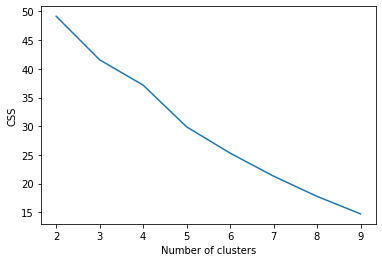

In [629]:
#Plotting between the number of clusters and the CSS to get the optimum number of clusters
import matplotlib.pyplot as plt
plt.plot(range(2, 10), css)
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

In [630]:
data_pos

,Rating,Date,Review,Sentiment,Review_1
7,5,2023-02-16,Very good product quantity price the best,1.0,good product quantity price best
9,5,2023-02-16,Good,1.0,good
8,5,2023-02-15,Transfer speed is good. Go ahead.,1.0,transfer speed good go ahead
11,5,2023-02-10,Pens drive is best,1.0,pens drive best
10,5,2023-02-07,This is a good product in Amazon deeal,1.0,good product amazon deeal
...,...,...,...,...,...
109,4,2021-09-05,Very good useful product,1.0,good useful product
272,5,2021-09-02,Data transfer very fast.,1.0,data transfer fast
284,5,2021-09-02,Value for money.,1.0,value money
211,5,2021-08-31,"Good product, a suitable device with huge capa...",1.0,good product suitable device huge capacity loo...


In [631]:
NUM_CLUSTERS = 4
km2 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=1000, n_init=15, random_state=42).fit(tfidf_matrix)
# Adding Cluster levels in the original dataframe 
data_pos['kmeans_cluster'] = km2.labels_
#Review.head(10)

Reveiw_clusters = (data_pos[['Rating', 'kmeans_cluster', 'Review_1']].groupby('kmeans_cluster').head(100))
#movie_clusters = movie_clusters.copy(deep=True)

feature_names = tfidf.get_feature_names()
topn_features = 8
ordered_centroids = km2.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    Review_1 = Reveiw_clusters[Reveiw_clusters['kmeans_cluster'] == cluster_num].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #1
Key Features: ['quality', 'best', 'product', 'good', 'value money', 'value', 'nice product', 'money']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['product', 'good product', 'good', 'best', 'storage', 'value money', 'value', 'money']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['good', 'best', 'speed', 'product', 'good product', 'storage', 'use', 'transfer']
--------------------------------------------------------------------------------
CLUSTER #4
Key Features: ['nice', 'use', 'speed', 'nice product', 'transfer', 'data', 'storage', 'good']
--------------------------------------------------------------------------------


C:\Users\dishu\AppData\Local\Temp\ipykernel_28404\917219252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pos['kmeans_cluster'] = km2.labels_
C:\Users\dishu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [632]:
#Cluster1 - Value
#Cluster2 - Satisfaction
#Cluster3 - Speed
#Cluster4 - quality

In [633]:
# dividing the data set for model building and validation 
X_train_1, X_hold_1 = train_test_split(data_neg, test_size=0.2, random_state=111)

In [634]:
# Vectorizing and fitting the model. Note that while vectorizing, we are not taking those words that appear in less than 50 documents.
# We are not taking those words that appear in more than 75% of documents. We are only considering 6000 words in the vectorspace.
vectorizer_tf = TfidfVectorizer(max_df=0.95, min_df=2, max_features=6000)
tf_vectors = vectorizer_tf.fit_transform(X_train_1.Review_1) 

In [635]:
# LatentDirichletAllocation function will find the pronciple direction for each document  
lda = decomposition.LatentDirichletAllocation(n_components=3, max_iter=5, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

In [636]:
# score of each document in the 3 principle directions 
W1

array([[0.33333333, 0.33333333, 0.33333333],
       [0.13701876, 0.72881863, 0.13416261],
       [0.58135569, 0.21413553, 0.20450878],
       [0.69186377, 0.15579468, 0.15234154],
       [0.71154718, 0.14728054, 0.14117228],
       [0.72997824, 0.14488393, 0.12513783],
       [0.75826096, 0.12190021, 0.11983882],
       [0.33333333, 0.33333333, 0.33333333],
       [0.13245064, 0.74767299, 0.11987637],
       [0.13278841, 0.12659525, 0.74061635],
       [0.64786334, 0.17664331, 0.17549336],
       [0.33333333, 0.33333333, 0.33333333],
       [0.78153927, 0.10467322, 0.11378751],
       [0.68773771, 0.15276687, 0.15949542],
       [0.16112828, 0.15522499, 0.68364674],
       [0.15432017, 0.16066153, 0.68501831],
       [0.68773771, 0.15276687, 0.15949542],
       [0.79073511, 0.10382979, 0.1054351 ],
       [0.1589155 , 0.68744083, 0.15364366],
       [0.72190265, 0.14166614, 0.13643121],
       [0.12100309, 0.75842732, 0.12056958],
       [0.10236791, 0.79204989, 0.1055822 ],
       [0.

In [637]:
# Collecting 3 most frequent words for each of the 6 priciple directions. From these words, one have to understand what topic 
# name should be appropriate for each topic. 
num_words=20

vocab = np.array(vectorizer_tf.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [638]:
topics

['product dont buy working lock use data pendrive transfer money amazon mb storage poor faulty instead speed received extremely capacity',
 'gb good usb problem storage pendrive low even body support transfer return port bad capacity speed 31 files use 64',
 'pen corrupted like buy slow drive 20 low movie please waste data usb laptop return expect speed storage 31 support']

In [639]:
#topics
#Topic 1 - Slow
#Topic 2 - storage
#Topic 3 - wrong product

In [640]:
# Identifying dominant topic for each document 
#Creates a list of column names for a dataframe that will store the results of a topic modeling analysis. The number of columns in the dataframe is determined by the number of topics identified in the analysis. The code uses a list comprehension to generate column names in the format "Topic0", "Topic1", "Topic2", etc. The variable "lda" is assumed to contain a topic model object with an attribute "n_components" that stores the number of topics.
#Creates a list of document names for the same dataframe. The number of document names is determined by the length of a pandas dataframe "X_train" and the naming format is "Doc0", "Doc1", "Doc2", etc.
#Creates a pandas dataframe "Review_doc_topic" with the topic modeling results. The dataframe is initialized with values from a numpy array "W1" that contains the topic weights for each document. The column names and index values are set using the lists created in steps 1 and 2.
#Determines the dominant topic for each document by finding the index of the highest value in each row of the "Review_doc_topic" dataframe (using the numpy function "argmax"). This index corresponds to the topic with the highest weight for that document. The dominant topic is stored in a new column "dominant_topic" in the "Review_doc_topic" dataframe.

colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_train_1.Review_1))]
Review_doc_topic = pd.DataFrame(np.round(W1, 3), columns=colnames, index=docnames)
significant_topic = np.argmax(Review_doc_topic.values, axis=1)
Review_doc_topic['dominant_topic'] = significant_topic

In [641]:
Review_doc_topic.head(5)

,Topic0,Topic1,Topic2,dominant_topic
Doc0,0.333,0.333,0.333,0
Doc1,0.137,0.729,0.134,1
Doc2,0.581,0.214,0.205,0
Doc3,0.692,0.156,0.152,0
Doc4,0.712,0.147,0.141,0


In [642]:
significant_topic

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 0, 1,
       2, 0], dtype=int64)

In [643]:
# Just checking if documents are align with the topics 
X_train_1['Topic'] = significant_topic
X_train_1

,Rating,Date,Review,Sentiment,Review_1,Topic
445,1,2022-07-02,It's broken,0.0,broken,0
203,1,2022-07-29,Ismai 3 GB se Badi file nahi send kar sakte h ...,0.0,ismai 3 gb se badi file nahi send kar sakte h ...,1
596,1,2022-02-24,Extremely sliw spoed. @ 1mbps.,0.0,extremely sliw spoed 1mbps,0
524,1,2021-09-28,Koyi sasti hi kharid lena iska lock kam krna b...,0.0,koyi sasti hi kharid lena iska lock kam krna b...,0
234,1,2022-09-08,Storage received 124gb instead of 128gb,0.0,storage received 124gb instead 128gb,0
376,1,2022-02-20,"The design is faulty, havent been able to inse...",0.0,design faulty havent able insert pendrive prop...,0
242,1,2022-06-28,Used pendrive for two months now it is not wor...,0.0,used pendrive two months working fake pendrive...,0
82,4,2022-01-21,Small should be large,0.0,small large,0
483,1,2021-10-10,"I thought, its writing speed will be high but ...",0.0,thought writing speed high reality bitter 126m...,1
518,1,2021-08-28,Pretty disappointed.. The drive just completel...,0.0,pretty disappointed drive completely stopped w...,2


In [644]:
# Check how good our model for unknown data 
WHold = lda.transform(vectorizer_tf.transform(X_hold_1.Review_1[:5]))

In [645]:
# Identifying dominant topic for holdout documents 
# Identifying dominant topic for each document 
#Creates a list of column names for a dataframe that will store the results of a topic modeling analysis. The number of columns in the dataframe is determined by the number of topics identified in the analysis. The code uses a list comprehension to generate column names in the format "Topic0", "Topic1", "Topic2", etc. The variable "lda" is assumed to contain a topic model object with an attribute "n_components" that stores the number of topics.
#Creates a list of document names for the same dataframe. The number of document names is determined by the length of a pandas dataframe "X_train" and the naming format is "Doc0", "Doc1", "Doc2", etc.
#Creates a pandas dataframe "Review_doc_topic" with the topic modeling results. The dataframe is initialized with values from a numpy array "W1" that contains the topic weights for each document. The column names and index values are set using the lists created in steps 1 and 2.
#Determines the dominant topic for each document by finding the index of the highest value in each row of the "Review_doc_topic" dataframe (using the numpy function "argmax"). This index corresponds to the topic with the highest weight for that document. The dominant topic is stored in a new column "dominant_topic" in the "Review_doc_topic" dataframe.

colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_hold_1.Review_1[:5]))]
Review_doc_topic = pd.DataFrame(np.round(WHold, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(Review_doc_topic.values, axis=1)
Review_doc_topic['dominant_topic'] = significant_topic

In [646]:
Review_doc_topic

,Topic0,Topic1,Topic2,dominant_topic
Doc0,0.33,0.33,0.33,0
Doc1,0.18,0.64,0.18,1
Doc2,0.13,0.13,0.74,2
Doc3,0.12,0.76,0.12,1
Doc4,0.15,0.14,0.71,2


In [647]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 2),min_df=2, max_df=.90)

tfidf_matrix = tfidf.fit_transform(data_neg.Review_1)
tfidf_matrix

<58x101 sparse matrix of type '<class 'numpy.float64'>'
	with 335 stored elements in Compressed Sparse Row format>

In [648]:
tfidf_matrix = tfidf_matrix.toarray()

In [649]:
from sklearn.cluster import KMeans
#This line initializes an empty list that will be used to store the values of the sum of squared distances of samples to their closest cluster center (also known as the "inertia") for each value of k that is tested
css = [] 
# This line creates a loop that iterates through a range of values of k (the number of clusters), from 2 to 9 (inclusive).
for i in range(2, 10): 
    ##This line creates an instance of the k-means algorithm with the specified number of clusters i, as well as some other hyperparameters. Specifically, the max_iter parameter sets the maximum number of iterations for each run of the k-means algorithm, the n_init parameter sets the number of times the k-means algorithm will be run with different random initializations, and the random_state parameter ensures that the random initialization is reproducible. The fit() method is then called on the TFIDF matrix tfidf_matrix to cluster the documents.
    kmeans = KMeans(n_clusters=i, max_iter=100, n_init=10, random_state=42).fit(tfidf_matrix)
    css.append(kmeans.inertia_)

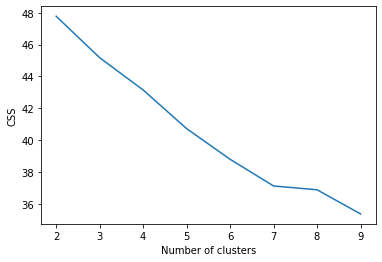

In [650]:
#Plotting between the number of clusters and the CSS to get the optimum number of clusters
import matplotlib.pyplot as plt
plt.plot(range(2, 10), css)
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

In [651]:
NUM_CLUSTERS = 3
km2 = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(tfidf_matrix)
# Adding Cluster levels in the original dataframe 
data_neg['kmeans_cluster'] = km2.labels_
#Review.head(10)

Reveiw_clusters = (data_neg[['Rating', 'kmeans_cluster', 'Review_1']].groupby('kmeans_cluster').head(10))
#movie_clusters = movie_clusters.copy(deep=True)

feature_names = tfidf.get_feature_names()
topn_features = 10
ordered_centroids = km2.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    Review_1 = Reveiw_clusters[Reveiw_clusters['kmeans_cluster'] == cluster_num].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #1
Key Features: ['dont buy', 'dont', 'buy', 'speed', '31', 'files', 'please', 'mb', 'waste', 'instead']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['pendrive', 'gb', 'speed', 'product', 'usb', 'drive', 'pen', 'working', 'transfer', 'data']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['good', 'good storage', 'storage', 'pc', 'hp', 'expect', 'copying', 'corrupted', 'data', 'detected']
--------------------------------------------------------------------------------


C:\Users\dishu\AppData\Local\Temp\ipykernel_28404\1314002506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_neg['kmeans_cluster'] = km2.labels_
C:\Users\dishu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [652]:
#Topics

#Cluster1 - Storage
#Cluster2 - Wrong product
#Cluster3 - Speed
 

In [653]:
data_neg

,Rating,Date,Review,Sentiment,Review_1,kmeans_cluster
0,4,2023-02-14,Its not 128gb its 115gb,0.0,128gb 115gb,1
33,2,2023-02-13,This pen drive is corrupted within 2 years. My...,0.0,pen drive corrupted within 2 years data lose,1
50,1,2023-02-10,I had ordered the set of 3 pendrives... But th...,0.0,ordered set 3 pendrives pendrive slow even usb...,1
61,1,2023-02-06,DONT BUY AND WASTE YOUR MONEY IT IS VERY SLOW ...,0.0,dont buy waste money slow copy paste transfers...,0
72,1,2023-02-05,Don't buy this,0.0,dont buy,0
79,1,2023-02-05,"Very bad quality, print on body 64GB but inter...",0.0,bad quality print body 64gb internal capacity ...,1
15,5,2023-01-31,It's good but storage scammed,0.0,good storage scammed,2
81,1,2023-01-23,It is corrupted,0.0,corrupted,1
52,2,2023-01-12,NOT GOOD,0.0,good,2
93,1,2023-01-09,Wrost product ever,0.0,wrost product ever,1


In [654]:
#Phase 2 Reporting the findings

'''In Topic modelling the polarity value is positive and has similar polarity of the full dataset, therefore we can conclude 
that the product has an positive sentiment amongst the consumners. From N- gram model we have identified that the most frequent
reviews are good, nice. Therfore the overall sentiment about the product is positve, In the case of negative sentiments, we got
reivews such as the loose and bad.'''

'''In topic modelling of the positive and the negative sentiments, the topic we found about the postive sentiments are 

#Topic 1 - Timely Delivery
#Topic 2 - Fragnance
#Topic 3 - Scent and Cleanliness
#Topic 4 - Packaging
#Topic 5 - Stain remover
#Topic 6 - Machine Freindly
#Topic 7 - Dirt Remover

the topic we found about the Negative sentiments are 

#Topic 1 - Super Sealing but delay
#Topic 2 - Low Quantity
#Topic 3 - Pouch and packaging
#Topic 4 - Bad Wrapping
#Topic 5 - Quality issues
#Topic 6 - Sealing issius
#Topic 7 - Quantity Issues


From the cluster analysis we got the clusters of Positive Sentiments are

#Cluster1 - Fragnance Features
#Cluster2 - value for money
#Cluster3 - Stain Removing Features
#Cluster4 - Budgeting Features
#Cluster5 - machine Friendly

From the cluster analysis we got the clusters of Negative Sentiments are

#Cluster1 - Damaged packaging
#Cluster2 - Low Quality
#Cluster3 - Quantity Issues
#Cluster4 - Budget

#Findings of full dataset
We can conlcude that the product provides lot of freshness and refreshness to the clothes while there are issues with the
packaging, price and the quantity provided.

Findings of Recent dataset

They have certainly improved the packaging part which is prominently visible in the clusters and the topics we got. There is a
issue with the deilvery of the product, It was taking more time than the usual. There is a issue with the sealing and quality 
and quantity issues

We are getting changes in the findings on the most recent 25% of the data

Reason:

Based on older ratings, Ariel has updated its packaging which was the major issue in older packs
They have also worked on the Freshness and Quality related issues.
They have taken the feedback of the older reviews and updated the packing with aluminium and therefore the negative sentiments 
related to the the pakacging are considerably reduced.

Suggestions - Improve quality and the time of delivery.


'''

'In topic modelling of the positive and the negative sentiments, the topic we found about the postive sentiments are \n\n#Topic 1 - Timely Delivery\n#Topic 2 - Fragnance\n#Topic 3 - Scent and Cleanliness\n#Topic 4 - Packaging\n#Topic 5 - Stain remover\n#Topic 6 - Machine Freindly\n#Topic 7 - Dirt Remover\n\nthe topic we found about the Negative sentiments are \n\n#Topic 1 - Super Sealing but delay\n#Topic 2 - Low Quantity\n#Topic 3 - Pouch and packaging\n#Topic 4 - Bad Wrapping\n#Topic 5 - Quality issues\n#Topic 6 - Sealing issius\n#Topic 7 - Quantity Issues\n\n\nFrom the cluster analysis we got the clusters of Positive Sentiments are\n\n#Cluster1 - Fragnance Features\n#Cluster2 - value for money\n#Cluster3 - Stain Removing Features\n#Cluster4 - Budgeting Features\n#Cluster5 - machine Friendly\n\nFrom the cluster analysis we got the clusters of Negative Sentiments are\n\n#Cluster1 - Damaged packaging\n#Cluster2 - Low Quality\n#Cluster3 - Quantity Issues\n#Cluster4 - Budget\n\n#Findings

# Phase 3

In [655]:
data_neg.tail()

,Rating,Date,Review,Sentiment,Review_1,kmeans_cluster
222,5,2021-10-09,all pen drives are corrupt in 1 month,0.0,pen drives corrupt 1 month,1
524,1,2021-09-28,Koyi sasti hi kharid lena iska lock kam krna b...,0.0,koyi sasti hi kharid lena iska lock kam krna b...,1
324,1,2021-09-24,I am not able to use properly..\ndifficult to ...,0.0,able use properly difficult transfer data auto...,1
518,1,2021-08-28,Pretty disappointed.. The drive just completel...,0.0,pretty disappointed drive completely stopped w...,1
319,2,2021-08-22,HP is good in PC but not good in storage devices.,0.0,hp good pc good storage devices,2


In [656]:
# Convert the 'B' column to an array
Review_array = data_neg['Review_1'].values

# Print the array
print(Review_array)

['128gb 115gb' 'pen drive corrupted within 2 years data lose'
 'ordered set 3 pendrives pendrive slow even usb 20 pendrive reads data faster usb 31 really feel like worst purchase selection dont like buy'
 'dont buy waste money slow copy paste transfers kb instead mb' 'dont buy'
 'bad quality print body 64gb internal capacity 32gb'
 'good storage scammed' 'corrupted' 'good' 'wrost product ever'
 'product product quality nice storage capacity good 64gb missed 7gb received 57gb'
 'like price low' ''
 'fake product checked hp recognised also device write protected first use please avoid metallic product buy something else'
 'movierulz lo movie support waste pen drive'
 'ordered 128gb inserting computer showing 115gb please change'
 'pendrive file transfer speed slow' 'good' 'poor data transfer speed'
 'transfer rate low usb 3x' 'working easyly workmenship poor'
 '64 gb ke naam pe kewal 577 gb ye kya h'
 'copying files stop working giving error bad product serious quality issue expect faul

In [657]:
# Convert the array to a string
Review_str = '. \n'.join(map(str, Review_array))

Review_str = Review_str.replace(",", "")

# Print the string
print(Review_str)


128gb 115gb. 
pen drive corrupted within 2 years data lose. 
ordered set 3 pendrives pendrive slow even usb 20 pendrive reads data faster usb 31 really feel like worst purchase selection dont like buy. 
dont buy waste money slow copy paste transfers kb instead mb. 
dont buy. 
bad quality print body 64gb internal capacity 32gb. 
good storage scammed. 
corrupted. 
good. 
wrost product ever. 
product product quality nice storage capacity good 64gb missed 7gb received 57gb. 
like price low. 
. 
fake product checked hp recognised also device write protected first use please avoid metallic product buy something else. 
movierulz lo movie support waste pen drive. 
ordered 128gb inserting computer showing 115gb please change. 
pendrive file transfer speed slow. 
good. 
poor data transfer speed. 
transfer rate low usb 3x. 
working easyly workmenship poor. 
64 gb ke naam pe kewal 577 gb ye kya h. 
copying files stop working giving error bad product serious quality issue expect faulty product qual

In [658]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(Review_str)
print(tokens)

['128gb', '115gb', '.', 'pen', 'drive', 'corrupted', 'within', '2', 'years', 'data', 'lose', '.', 'ordered', 'set', '3', 'pendrives', 'pendrive', 'slow', 'even', 'usb', '20', 'pendrive', 'reads', 'data', 'faster', 'usb', '31', 'really', 'feel', 'like', 'worst', 'purchase', 'selection', 'dont', 'like', 'buy', '.', 'dont', 'buy', 'waste', 'money', 'slow', 'copy', 'paste', 'transfers', 'kb', 'instead', 'mb', '.', 'dont', 'buy', '.', 'bad', 'quality', 'print', 'body', '64gb', 'internal', 'capacity', '32gb', '.', 'good', 'storage', 'scammed', '.', 'corrupted', '.', 'good', '.', 'wrost', 'product', 'ever', '.', 'product', 'product', 'quality', 'nice', 'storage', 'capacity', 'good', '64gb', 'missed', '7gb', 'received', '57gb', '.', 'like', 'price', 'low.', '.', 'fake', 'product', 'checked', 'hp', 'recognised', 'also', 'device', 'write', 'protected', 'first', 'use', 'please', 'avoid', 'metallic', 'product', 'buy', 'something', 'else', '.', 'movierulz', 'lo', 'movie', 'support', 'waste', 'pen',

In [659]:
tmp = 0

for ngram in nltk.ngrams(tokens, 3):
    print (ngram,)
    tmp += 1
print(tmp)

('128gb', '115gb', '.')
('115gb', '.', 'pen')
('.', 'pen', 'drive')
('pen', 'drive', 'corrupted')
('drive', 'corrupted', 'within')
('corrupted', 'within', '2')
('within', '2', 'years')
('2', 'years', 'data')
('years', 'data', 'lose')
('data', 'lose', '.')
('lose', '.', 'ordered')
('.', 'ordered', 'set')
('ordered', 'set', '3')
('set', '3', 'pendrives')
('3', 'pendrives', 'pendrive')
('pendrives', 'pendrive', 'slow')
('pendrive', 'slow', 'even')
('slow', 'even', 'usb')
('even', 'usb', '20')
('usb', '20', 'pendrive')
('20', 'pendrive', 'reads')
('pendrive', 'reads', 'data')
('reads', 'data', 'faster')
('data', 'faster', 'usb')
('faster', 'usb', '31')
('usb', '31', 'really')
('31', 'really', 'feel')
('really', 'feel', 'like')
('feel', 'like', 'worst')
('like', 'worst', 'purchase')
('worst', 'purchase', 'selection')
('purchase', 'selection', 'dont')
('selection', 'dont', 'like')
('dont', 'like', 'buy')
('like', 'buy', '.')
('buy', '.', 'dont')
('.', 'dont', 'buy')
('dont', 'buy', 'waste')


In [660]:
ngram_freq = nltk.FreqDist() #WE INITIALIZED A FREQUENCY COUNTER

for ngram in nltk.ngrams(tokens, 1):
    ngram_freq[ngram] += 1
ngram_freq.most_common(20)

[(('.',), 53),
 (('pendrive',), 23),
 (('usb',), 14),
 (('speed',), 12),
 (('drive',), 11),
 (('buy',), 11),
 (('gb',), 11),
 (('dont',), 10),
 (('hp',), 10),
 (('product',), 9),
 (('pen',), 8),
 (('data',), 8),
 (('good',), 7),
 (('storage',), 7),
 (('like',), 6),
 (('also',), 6),
 (('use',), 6),
 (('transfer',), 6),
 (('working',), 6),
 (('amazon',), 6)]

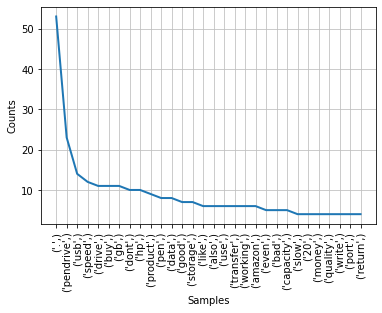

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [661]:
ngram_freq.plot(30)

In [662]:
# Define a function to generate all possible combinations of a list
def get_all_combinations(lst):
    if len(lst) == 0:
        return [[]]
    combinations = []
    for i in range(2 ** len(lst) - 1):
        subset = [lst[j] for j in range(len(lst)) if i & (1 << j)]
        combinations.append(subset)
    return combinations
# Define the three sample phrases
phrase1 = "ariel super saver"
phrase2 = "pls donot buy"
phrase3 = "quantity menshandthe packet"

# Tokenize the phrases into words
words1 = phrase1.split()
words2 = phrase2.split()
words3 = phrase3.split()

# Generate all possible combinations of the words
combinations = []
for i in range(len(words1)):
    combinations.extend(get_all_combinations(words1[i:]))
for i in range(len(words2)):
    combinations.extend(get_all_combinations(words2[i:]))
for i in range(len(words3)):
    combinations.extend(get_all_combinations(words3[i:]))

In [663]:
# define a list of phrases to search for
#phrases = ['super saver', 'ariel super', 'saver pack']
phrases = ['slow', 'dont', 'storage']

# loop through the phrases and print the corresponding rows
matches = df['Review_1'].str.contains('|'.join(phrases))

df[matches]

,Rating,Date,Review,Sentiment,Review_1
50,1,2023-02-10,I had ordered the set of 3 pendrives... But th...,0.0,ordered set 3 pendrives pendrive slow even usb...
61,1,2023-02-06,DONT BUY AND WASTE YOUR MONEY IT IS VERY SLOW ...,0.0,dont buy waste money slow copy paste transfers...
72,1,2023-02-05,Don't buy this,0.0,dont buy
15,5,2023-01-31,It's good but storage scammed,0.0,good storage scammed
20,5,2023-01-20,For data storage. It is excellent.,1.0,data storage excellent
...,...,...,...,...,...
201,4,2020-01-05,I don't know about the speed but built quality...,1.0,dont know speed built quality much better sand...
327,4,2019-12-28,Handy & good storage,1.0,handy good storage
136,5,2019-12-23,I purchased this product to keep a backup of m...,1.0,purchased product keep backup desktop files sm...
113,5,2019-11-18,I purchased this item in order to keep a backu...,1.0,purchased item order keep backup files stored ...


In [664]:
# dividing the data set for model building and validation 
Xcr_train, Xcr_hold = train_test_split(df[matches], test_size=0.3, random_state=111)

In [665]:
# Just checking the distribution of 'product' column for train data 
Xcr_train['Rating'].value_counts()

5    18
4    12
3    12
2     9
1     8
Name: Rating, dtype: int64

In [666]:
# Vectorizing and fitting the model. Note that while vectorizing, we are not taking those words that appear in less than 50 documents.
# We are not taking those words that appear in more than 75% of documents. We are only considering 6000 words in the vectorspace.
vectorizer_tf = TfidfVectorizer(max_df=0.95, min_df=5, max_features=6000)
tf_vectors = vectorizer_tf.fit_transform(Xcr_train.Review_1) 

In [667]:
# just checking the vectors corresponding to each document 
tf_vectors

<59x18 sparse matrix of type '<class 'numpy.float64'>'
	with 208 stored elements in Compressed Sparse Row format>

In [668]:
# LatentDirichletAllocation function will find the pronciple direction for each document  
lda = decomposition.LatentDirichletAllocation(n_components=3, max_iter=5, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

In [669]:
# score of each document in the 3 principle directions 
W1

array([[0.21390109, 0.16268828, 0.62341062],
       [0.21390109, 0.16268828, 0.62341062],
       [0.124149  , 0.14096073, 0.73489027],
       [0.15396102, 0.14011228, 0.7059267 ],
       [0.10722248, 0.11562542, 0.7771521 ],
       [0.67859668, 0.16650006, 0.15490326],
       [0.17580521, 0.69473058, 0.12946421],
       [0.12139963, 0.76171149, 0.11688889],
       [0.21390109, 0.16268828, 0.62341062],
       [0.71198635, 0.14305099, 0.14496266],
       [0.65924689, 0.18986421, 0.1508889 ],
       [0.6725125 , 0.15159164, 0.17589587],
       [0.69284747, 0.15718325, 0.14996928],
       [0.70970793, 0.15685971, 0.13343237],
       [0.74186705, 0.12819077, 0.12994218],
       [0.14334595, 0.72625403, 0.13040002],
       [0.15079552, 0.51719341, 0.33201107],
       [0.64148829, 0.18059726, 0.17791445],
       [0.7402651 , 0.13846946, 0.12126544],
       [0.28698591, 0.58591961, 0.12709448],
       [0.19106732, 0.66793272, 0.14099995],
       [0.12875513, 0.74436306, 0.12688181],
       [0.

In [670]:
# Collecting 10 most frequent words for each of the 6 priciple directions. From these words, one have to understand what topic 
# name should be appropriate for each topic. 
num_words=15

vocab = np.array(vectorizer_tf.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

C:\Users\dishu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [671]:
topics

['storage slow speed capacity product gb drive buy data write transfer 31 also pendrive good',
 'pendrive product storage speed gb also transfer work good capacity slow usb data dont buy',
 'good dont data storage usb write pendrive 31 slow buy speed transfer drive product also']

In [672]:
#Topics
#Topic1 - Storage
#Topic2 - Speed
#Topic3 - Capacity


In [673]:
# Identifying dominant topic for each document 
colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(Xcr_train.Review_1))]
df_doc_topic = pd.DataFrame(np.round(W1, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [674]:
df_doc_topic

,Topic0,Topic1,Topic2,dominant_topic
Doc0,0.21,0.16,0.62,2
Doc1,0.21,0.16,0.62,2
Doc2,0.12,0.14,0.73,2
Doc3,0.15,0.14,0.71,2
Doc4,0.11,0.12,0.78,2
Doc5,0.68,0.17,0.15,0
Doc6,0.18,0.69,0.13,1
Doc7,0.12,0.76,0.12,1
Doc8,0.21,0.16,0.62,2
Doc9,0.71,0.14,0.14,0


In [675]:
# Just checking if documents are align with the topics 
Xcr_train.head()

,Rating,Date,Review,Sentiment,Review_1
15,5,2023-01-31,It's good but storage scammed,0.0,good storage scammed
327,4,2019-12-28,Handy & good storage,1.0,handy good storage
134,3,2020-08-25,The product is good. But it gets hot while und...,1.0,product good gets hot normal use write speed s...
61,1,2023-02-06,DONT BUY AND WASTE YOUR MONEY IT IS VERY SLOW ...,0.0,dont buy waste money slow copy paste transfers...
50,1,2023-02-10,I had ordered the set of 3 pendrives... But th...,0.0,ordered set 3 pendrives pendrive slow even usb...


In [676]:
#check how good our model for unknown data 
WHold = lda.transform(vectorizer_tf.transform(Xcr_hold.Review_1[:5]))

In [677]:
# Identifying dominant topic for holdout documents 
colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(Xcr_hold.Review_1[:5]))]
df_doc_topic = pd.DataFrame(np.round(WHold, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [678]:
df_doc_topic

,Topic0,Topic1,Topic2,dominant_topic
Doc0,0.14,0.15,0.71,2
Doc1,0.63,0.18,0.19,0
Doc2,0.21,0.16,0.62,2
Doc3,0.63,0.18,0.19,0
Doc4,0.17,0.18,0.64,2


In [679]:
# Just check how good the model fit for unknown data 
Xcr_hold.head()

,Rating,Date,Review,Sentiment,Review_1
201,4,2020-01-05,I don't know about the speed but built quality...,1.0,dont know speed built quality much better sand...
420,3,2020-03-01,Ok nice but slow,0.0,ok nice slow
486,5,2020-09-19,Built quality and storage is quite good.,1.0,built quality storage quite good
411,2,2021-07-17,Not functioning properly and slow,0.0,functioning properly slow
597,2,2020-01-26,its sturdy and looking good but in terms of tr...,0.0,sturdy looking good terms transferring datait ...


In [680]:
#Phase 3 Reportings

'''The objecitive was to find three critical problems in the most recent 25% of data'''

''' The three critical phrases was quality, pouch and bottle

Therefore there were issues on the pouch, and bottle which is related to the sealing and packaging issues and quality represents 
the quality issues in the product as well

We found all the sentences having this phrases and did topic modelling, the topics are

#Topics
#Topic1 - Price Friendly but quantity issues
#Topic2 - Qualtity Issues
#Topic3 - Washing
#Topic4 - Packaging issuses
#Topic5 - Machine Use
#Topic6 - Quantity

The topic 2 represents that there are quality issues with the product and which is one of the critical issue that needs to be
addressed.

Report your finding on three critical topics where management should pay attention. 

The management should pay attention on

1.Pacakaging
2.Sealing
3.Quality.

The topic 4 gives us the indication of the packaging issues which is a critcal problem in ariel.

Suggestion

The packaging in the case of ariel is severly damaged and found leaking in multiple occasions, Therfore provide a airtight 
sealing and packaging to avoid leaking even though it comes up with aluminium packing

The second finding is that there are lot of chinese labels which decreases the quality of the product, therefore provide
authentic indian label product to the consumers.

'''

' The three critical phrases was quality, pouch and bottle\n\nTherefore there were issues on the pouch, and bottle which is related to the sealing and packaging issues and quality represents \nthe quality issues in the product as well\n\nWe found all the sentences having this phrases and did topic modelling, the topics are\n\n#Topics\n#Topic1 - Price Friendly but quantity issues\n#Topic2 - Qualtity Issues\n#Topic3 - Washing\n#Topic4 - Packaging issuses\n#Topic5 - Machine Use\n#Topic6 - Quantity\n\nThe topic 2 represents that there are quality issues with the product and which is one of the critical issue that needs to be\naddressed.\n\nReport your finding on three critical topics where management should pay attention. \n\nThe management should pay attention on\n\n1.Pacakaging\n2.Sealing\n3.Quality.\n\nThe topic 4 gives us the indication of the packaging issues which is a critcal problem in ariel.\n\nSuggestion\n\nThe packaging in the case of ariel is severly damaged and found leaking i

# Phase 4

In [681]:
df

,Rating,Date,Review,Sentiment,Review_1
7,5,2023-02-16,Very good product quantity price the best,1.0,good product quantity price best
9,5,2023-02-16,Good,1.0,good
8,5,2023-02-15,Transfer speed is good. Go ahead.,1.0,transfer speed good go ahead
0,4,2023-02-14,Its not 128gb its 115gb,0.0,128gb 115gb
33,2,2023-02-13,This pen drive is corrupted within 2 years. My...,0.0,pen drive corrupted within 2 years data lose
...,...,...,...,...,...
198,4,2019-07-30,"The product is looking nice,Will leave a full ...",1.0,product looking nicewill leave full review use...
334,5,2019-07-29,Nice pen drive. Good metallic body. Usb 3.1 . ...,1.0,nice pen drive good metallic body usb 31 read ...
491,3,2019-07-27,"Good, but write speed is less.",0.0,good write speed less
271,3,2019-07-19,THE PENDRIVE LOOKS ARE GOOD AND THERE IS METTA...,0.0,pendrive looks good mettalic casing however co...


In [682]:
data_ph4 = df

In [683]:
#This code adds a new column to a Pandas DataFrame Review, which is based on the values in an existing column Ratings.
#Review['class'] creates a new column named 'class' in the DataFrame Review.
#Review['Ratings'].apply(lambda x: 0 if(x<4) else 1) applies a lambda function to each value in the 'Ratings' column, which maps values less than 4 to 0, and values greater than or equal to 4 to 1. This is a way of binarizing the ratings data into two classes: 0 (for negative reviews) and 1 (for positive reviews).

data_ph4['class'] = data_ph4['Rating'].apply(lambda x: 0 if(x<4) else 1)
data_ph4

,Rating,Date,Review,Sentiment,Review_1,class
7,5,2023-02-16,Very good product quantity price the best,1.0,good product quantity price best,1
9,5,2023-02-16,Good,1.0,good,1
8,5,2023-02-15,Transfer speed is good. Go ahead.,1.0,transfer speed good go ahead,1
0,4,2023-02-14,Its not 128gb its 115gb,0.0,128gb 115gb,1
33,2,2023-02-13,This pen drive is corrupted within 2 years. My...,0.0,pen drive corrupted within 2 years data lose,0
...,...,...,...,...,...,...
198,4,2019-07-30,"The product is looking nice,Will leave a full ...",1.0,product looking nicewill leave full review use...,1
334,5,2019-07-29,Nice pen drive. Good metallic body. Usb 3.1 . ...,1.0,nice pen drive good metallic body usb 31 read ...,1
491,3,2019-07-27,"Good, but write speed is less.",0.0,good write speed less,0
271,3,2019-07-19,THE PENDRIVE LOOKS ARE GOOD AND THERE IS METTA...,0.0,pendrive looks good mettalic casing however co...,0


In [684]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
 
    
    
    
# Input: "reviewText", "rating" and "time"
# Target: "log_votes"
X_train, X_test, y_train, y_test = train_test_split(data_ph4["Review"],
                                                  data_ph4["class"],
                                                  test_size=0.3,
                                                  shuffle=True, random_state = 124)
#X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
#X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True, min_df=0.0004, max_df=0.5)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test) 
#Don't fit() your TfidfVectorizer to your test data: it will 
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible

In [481]:
vocab = tfidf_vectorizer.get_feature_names()

#print(vocab)
len(vocab)

C:\Users\dishu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


1076

In [482]:
#Passsing all the classification Model in the Grid Search CV to to get the best hyperparameter

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier

#SVM Model with various parameters such as C and Kernel
model_params = {
    #SVM Model with various parameters such as C and Kernel
    #'svm': {
        #'model': svm.SVC(gamma='auto'),
       # 'params' : {
        #    'C': [1,10,20],
          #  'kernel': ['rbf','linear']
      #  }  
   # },
    #Random Forest Model with various parameters such as n_estimators
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    #Logistic Regression Model with various parameters such as C values
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    #Decision Tree Model with various parameters such as criterion, max depth, and splitter
     'Decision_Tree' : {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'criterion': ['entropy','gini','log_loss'],
            'max_depth': [3, 5, 7],
            'splitter': ['best', 'random']
        }
     },
    #Gaussian_NB with various parameters such as var_smoothing
      'Gaussian_NB' : {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
        }
      },
    #Multinomial_NB with various parameters such as alpha
      # 'Mutinomial_NB' : {
       # 'model': MultinomialNB(),
        #'params': {
         #   'alpha': [0.1, 0.5, 1.0, 2.0]
        #}
      #},
    #Bernoulli_NB with various parameters such as alpha and Binarize
       'Bernoulli_NB' : {
        'model': BernoulliNB(),
        'params': {
     
            'alpha': [0.1, 0.5, 1.0, 2.0],
            'binarize': [0.0, 0.1, 0.2, 0.3]
        }
      },
    #XGboostClassifier with various parameters such as learning rate, max_depth and n_estimator
       'XGboostClassifier' : {
        'model': XGBClassifier(),
        'params': {
            'learning_rate': [0.01, 0.1, 0.5],
            'max_depth': [3, 5, 7],
            'n_estimators': [100, 500, 1000]
        }
      }
    
}

In [686]:
X_train_vectors_tfidf
X_train_1  = X_train_vectors_tfidf.toarray()

In [687]:
#The code uses scikit-learn's GridSearchCV function to perform hyperparameter tuning for a given set of machine learning models, where GridSearchCV exhaustively searches over a specified range of hyperparameters and returns the best set of hyperparameters that resulted in the highest cross-validation score.

#Here is a step-by-step explanation of the code:

from sklearn.model_selection import GridSearchCV#: #Imports the GridSearchCV function from scikit-learn's model_selection module.

#scores = []: Initializes an empty list called scores to store the results of each model's best score and best parameters.

#for model_name, mp in model_params.items(): : Loops through each model's name and parameters specified in a dictionary called model_params.

#clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False): Initializes a GridSearchCV object for the current model with the specified hyperparameters. The cv parameter is set to 5, which means that 5-fold cross-validation will be used, and return_train_score is set to False to avoid computing the training score during cross-validation.

#clf.fit(X_res, y_res): Fits the GridSearchCV object on the training data, X_res and y_res.

#scores.append({'model': model_name, 'best_score': clf.best_score_, 'best_params': clf.best_params_}): Appends a dictionary to the scores list that contains the name of the current model, its best cross-validation score, and its best hyperparameters.

#df = pd.DataFrame(scores,columns=['model','best_score','best_params']): Creates a pandas dataframe called df using the list of dictionaries stored in scores, with columns for the model name, best score, and best hyperparameters.

#Overall, the code runs a grid search over specified hyperparameters for each model in model_params, computes the cross-validation score for each set of hyperparameters, and returns a dataframe with the best score and hyperparameters for each model.
#from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_1, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

C:\Users\dishu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dishu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dishu\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\dishu\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_me

,model,best_score,best_params
0,random_forest,0.785714,{'n_estimators': 10}
1,logistic_regression,0.807143,{'C': 5}
2,Decision_Tree,0.842857,"{'criterion': 'entropy', 'max_depth': 3, 'spli..."
3,Gaussian_NB,0.700000,{'var_smoothing': 1e-06}
4,Bernoulli_NB,0.795238,"{'alpha': 1.0, 'binarize': 0.1}"
5,XGboostClassifier,0.835714,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est..."


In [688]:
X_train

233    Sturdy pen drive , can handle rough usage, Mad...
127    super nice metal built. handy usb3.1 connector...
14     Product and product quality is nice but the st...
408    This pendrive is value for money and it looks ...
64     I am not much of a technical person. Not sure ...
                             ...                        
327                                 Handy & good storage
523    This pen drive is over heating during usage an...
483    I thought, its writing speed will be high but ...
81                                       It is corrupted
500    This pendrive is very slow. i want to return i...
Name: Review, Length: 420, dtype: object

In [ ]:
X_test_1 = X_test_vectors_tfidf.toarray()

In [689]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_test_1, y_test)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

C:\Users\dishu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dishu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dishu\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\dishu\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_me

,model,best_score,best_params
0,random_forest,0.729279,{'n_estimators': 10}
1,logistic_regression,0.773273,{'C': 10}
2,Decision_Tree,0.751502,"{'criterion': 'entropy', 'max_depth': 3, 'spli..."
3,Gaussian_NB,0.596847,{'var_smoothing': 1e-06}
4,Bernoulli_NB,0.784685,"{'alpha': 0.1, 'binarize': 0.1}"
5,XGboostClassifier,0.751201,"{'learning_rate': 0.5, 'max_depth': 5, 'n_esti..."


In [690]:
#as the random forest has the best score, hence proceding with this
RF_tfidf=RandomForestClassifier()
RF_tfidf.fit(X_train_1, y_train)  #model

#Predict y value for test dataset
y_predict = RF_tfidf.predict(X_test_vectors_tfidf)
y_prob = RF_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
 
#Based on the values, we are printing the confusion matisx and classification Report
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
#Calculating the AUC Value  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc) 

              precision    recall  f1-score   support

           0       0.67      0.20      0.31        49
           1       0.77      0.96      0.85       132

    accuracy                           0.76       181
   macro avg       0.72      0.58      0.58       181
weighted avg       0.74      0.76      0.71       181

Confusion Matrix: [[ 10  39]
 [  5 127]]
AUC: 0.7218614718614718


In [691]:
y_predict

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1], dtype=int64)

In [692]:
X_test_vectors_tfidf

<181x1076 sparse matrix of type '<class 'numpy.float64'>'
	with 1420 stored elements in Compressed Sparse Row format>

In [693]:
data_ph4

,Rating,Date,Review,Sentiment,Review_1,class
7,5,2023-02-16,Very good product quantity price the best,1.0,good product quantity price best,1
9,5,2023-02-16,Good,1.0,good,1
8,5,2023-02-15,Transfer speed is good. Go ahead.,1.0,transfer speed good go ahead,1
0,4,2023-02-14,Its not 128gb its 115gb,0.0,128gb 115gb,1
33,2,2023-02-13,This pen drive is corrupted within 2 years. My...,0.0,pen drive corrupted within 2 years data lose,0
...,...,...,...,...,...,...
198,4,2019-07-30,"The product is looking nice,Will leave a full ...",1.0,product looking nicewill leave full review use...,1
334,5,2019-07-29,Nice pen drive. Good metallic body. Usb 3.1 . ...,1.0,nice pen drive good metallic body usb 31 read ...,1
491,3,2019-07-27,"Good, but write speed is less.",0.0,good write speed less,0
271,3,2019-07-19,THE PENDRIVE LOOKS ARE GOOD AND THERE IS METTA...,0.0,pendrive looks good mettalic casing however co...,0


In [694]:
m = sum(data_ph4['class'] == data_ph4['Sentiment'])
m

542

In [695]:
Accuracy = m*100/600
Accuracy

90.33333333333333

In [703]:
#Checking whether less stars means negative reviews

Review_1 = df[(df['class'] == 0)]
Review_1.tail()

,Rating,Date,Review,Sentiment,Review_1,class
371,3,2019-09-13,Haa it gives me 28gb only out of 32gb it's not...,0.0,haa gives 28gb 32gb fair pay 549rs,0
509,3,2019-09-05,An average pen drive,0.0,average pen drive,0
449,3,2019-08-16,This item is not 128 gb. This is 116 gb,0.0,item 128 gb 116 gb,0
491,3,2019-07-27,"Good, but write speed is less.",0.0,good write speed less,0
271,3,2019-07-19,THE PENDRIVE LOOKS ARE GOOD AND THERE IS METTA...,0.0,pendrive looks good mettalic casing however co...,0


In [704]:
# dividing the data set for model building and validation 
X_train, X_hold = train_test_split(Review_1, test_size=0.3, random_state=111)

In [706]:
# Just checking the distribution of 'product' column for train data 
X_train['Rating'].value_counts()

3    43
1    34
2    28
Name: Rating, dtype: int64

In [707]:
# Vectorizing and fitting the model. Note that while vectorizing, we are not taking those words that appear in less than 50 documents.
# We are not taking those words that appear in more than 75% of documents. We are only considering 6000 words in the vectorspace.
vectorizer_tf = TfidfVectorizer(max_df=0.95, min_df=2, max_features=6000)
tf_vectors = vectorizer_tf.fit_transform(X_train.Review_1) 

In [710]:
# LatentDirichletAllocation function will find the pronciple direction for each document  
lda = decomposition.LatentDirichletAllocation(n_components=4, max_iter=5, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

In [711]:
# score of each document in the 4 principle directions 
W1

array([[0.12753325, 0.61296278, 0.12771314, 0.13179083],
       [0.74576343, 0.08310383, 0.08500106, 0.08613167],
       [0.06940534, 0.07014941, 0.06759822, 0.79284702],
       [0.5992854 , 0.14008737, 0.13000407, 0.13062316],
       [0.0543862 , 0.05453174, 0.83589354, 0.05518853],
       [0.5992854 , 0.14008737, 0.13000407, 0.13062316],
       [0.0742612 , 0.07415946, 0.77350307, 0.07807627],
       [0.10699802, 0.67762604, 0.10673318, 0.10864276],
       [0.09774798, 0.09494407, 0.09639734, 0.7109106 ],
       [0.0552226 , 0.05500049, 0.05520775, 0.83456916],
       [0.06831274, 0.06926689, 0.79199878, 0.07042158],
       [0.082671  , 0.08405989, 0.08317053, 0.75009857],
       [0.12685222, 0.12648769, 0.12692514, 0.61973496],
       [0.05399843, 0.8389203 , 0.05359381, 0.05348746],
       [0.85377834, 0.04842194, 0.04858406, 0.04921566],
       [0.10885626, 0.11369806, 0.11181076, 0.66563492],
       [0.06747048, 0.79574467, 0.06726774, 0.06951711],
       [0.09571472, 0.70740863,

In [712]:
# Collecting 10 most frequent words for each of the 4 priciple directions. From these words, one have to understand what topic 
# name should be appropriate for each topic. 
num_words=10

vocab = np.array(vectorizer_tf.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

C:\Users\dishu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [713]:
topics

['buy port usb pendrive fast transferring dont extremely want nice',
 'gb 64 heating speed use dont storage warm nice pendrive',
 'hp transfer hot flash speed write poor build issue working',
 'good speed product slow like gb drive pendrive pen amazon']

In [714]:
#Topics
#Topic 1 - fast speed
#Topic 2 - overheating
#Topic 3 - built quality poor
#Topic 4 - transfer speed

In [715]:
#Phase 4 Reporting the findings

'''The objective is build a classifier that automatically identifies if a review is ‘positive’ or ‘negative’.  Based on the data
we classied the ratings 4 and 5 as 1 and rest of them are 0. We passed a Grid SearchCV on all the classification
models and found the model score.



We calculated the accuracy and random forest model gave the highest accuracy of 73% on the test dataset, Therefore we 
used forest model to predict the output and calculated the output on the test datset. 
Based on the manual checking, We classifed postitive and negative reviews manually and encoded postive as 1 and negative as 0
We calculated the accuracy, and the accuracy was 90.33%, which indicates that 90% of the time the reviews match with the sentiment.

But there is 10% percent chance of positive reviews getting less ratings and negative reivews getting high ratings.

Therfore High ratings does not necesssarily mean Positive reviews

It was further validated by topic modelling of the ratings of 3 or below which indicate negative sentiments
The topics we got after topic modelling are

#Topics
#Topic 1 - Leaky and Smelly
#Topic 2 - Costly
#Topic 3 - Good package and value for money
#Topic 4 - less Quantity
#Topic 5 - Degraded
#Topic 6 - Half the Quantity
#Topic 7 - Damaged

We can clearly say that the topic 3 is positve, therefore provides a clear indication that less stars does not necessarily mean
negative seniments and vice versa.


'''

"The objective is build a classifier that automatically identifies if a review is ‘positive’ or ‘negative’.  Based on the data\nwe classied the ratings 4 and 5 as 1 and rest of them are 0. We passed a Grid SearchCV on all the classification\nmodels and found the model score.\n\n\nmodel\tbest_score\tbest_params\n0\trandom_forest\t0.792857\t{'n_estimators': 10}\n1\tlogistic_regression\t0.823810\t{'C': 10}\n2\tDecision_Tree\t0.745238\t{'criterion': 'entropy', 'max_depth': 7, 'spli...\n3\tGaussian_NB\t0.709524\t{'var_smoothing': 1e-08}\n4\tBernoulli_NB\t0.838095\t{'alpha': 0.5, 'binarize': 0.0}\n5\tXGboostClassifier\t0.811905\t{'learning_rate': 0.5, 'max_depth': 3}\n\n\nWe calculated the accuracy and logistic regeression model gave the highest accuracy of 80% on the test dataset, Therefore we \nused logistic regression to predict the output and calculated the output on the test datset. \nBased on the manual checking, We classifed postitive and negative reviews manually and encoded postive 